<a href="https://colab.research.google.com/github/PotlachervuSrilatha/ML_Learning/blob/main/Co2_Emission_Project_3_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='maroon'> Importing data </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
import plotly.express as px

In [ ]:
data = pd.read_csv('co2_emissions.csv')

In [ ]:
data.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

In [ ]:
# Renaming columns
data = data.rename(columns={
    'make':'Make',
    'model':'Model',
    'vehicle_class':'Vehicle Class',
    'engine_size': 'Engine Size(L)',
    'cylinders':'Cylinders',
    'transmission':'Transmission',
    'fuel_type':'Fuel Type',
    'fuel_consumption_city':'Fuel Consumption City (L/100 km)',
    'fuel_consumption_hwy':'Fuel Consumption Hwy (L/100 km)',
    'fuel_consumption_comb(l/100km)':'Fuel_Consumption_Comb',
    'fuel_consumption_comb(mpg)': 'Fuel Consumption Comb (mpg)',
    'co2_emissions':'CO2_emission'
})

In [ ]:
data.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4           AS   
1  ACURA         ILX       COMPACT             2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT             1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6           AS   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  CO2_emission  
0                           33           196  
1                           29           221  
2                           48           136  
3                           25           255  
4                           27           244

# <font color='maroon'> Exploratory Data Analysis </font>

In [ ]:
# Checking for the data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel_Consumption_Comb             7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2_emission                      7385 non-null   int64  
dtypes: flo

The dataset contains **5 object columns, 3 int column and 4 float columns**

#### Duplicate Data

In [ ]:
data.duplicated().sum()

1112

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6273 non-null   object 
 1   Model                             6273 non-null   object 
 2   Vehicle Class                     6273 non-null   object 
 3   Engine Size(L)                    6273 non-null   float64
 4   Cylinders                         6273 non-null   int64  
 5   Transmission                      6273 non-null   object 
 6   Fuel Type                         6273 non-null   object 
 7   Fuel Consumption City (L/100 km)  6273 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6273 non-null   float64
 9   Fuel_Consumption_Comb             6273 non-null   float64
 10  Fuel Consumption Comb (mpg)       6273 non-null   int64  
 11  CO2_emission                      6273 non-null   int64  
dtypes: flo

Now, the dataset has **6281 records and 12 features with no missing and duplicate values**

In [ ]:
# checking for unique variables
print(data['Make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [ ]:
print(data['Model'].unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [ ]:
# Putting different transmission sub-catagories into their respective catagories


data['Transmission'] = np.where(data['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['M5','M6','M7']),'Manual',data['Transmission'])

print(data['Transmission'].unique())

['AS' 'M' 'CVT' 'AM' 'A']


In [ ]:
# Renaming fuel types for better understanding

print(data['Fuel Type'].value_counts())

data['Fuel Type']= np.where(data['Fuel Type']=='X','Regular gasoline',data['Fuel Type'])
data['Fuel Type']= np.where(data['Fuel Type']=='Z','Premium gasoline',data['Fuel Type'])
data['Fuel Type']= np.where(data['Fuel Type']=='E','Ethanol',data['Fuel Type'])
data['Fuel Type']= np.where(data['Fuel Type']=='D','Diesel',data['Fuel Type'])
data['Fuel Type']= np.where(data['Fuel Type']=='N','Natural gas',data['Fuel Type'])

print(data['Fuel Type'].unique())

X    3030
Z    2765
E     330
D     147
N       1
Name: Fuel Type, dtype: int64
['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']


In [ ]:
print(data['Vehicle Class'].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [ ]:
data.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4           AS   
1  ACURA         ILX       COMPACT             2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          CVT   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6           AS   

          Fuel Type  Fuel Consumption City (L/100 km)  \
0  Premium gasoline                               9.9   
1  Premium gasoline                              11.2   
2  Premium gasoline                               6.0   
3  Premium gasoline                              12.7   
4  Premium gasoline                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  CO2_emission  
0                           33           196  
1                           29           221  
2                           48           136  
3                           25           255  
4                           27           244

In [ ]:
data.shape

(6273, 12)

In [ ]:
# Checking for total null values if any

data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel_Consumption_Comb               0
Fuel Consumption Comb (mpg)         0
CO2_emission                        0
dtype: int64

There are **no missing values** present in this dataset

In [ ]:
# Insight of different statistical distribution of features and label

data.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    6273.0    3.163000   1.365294   0.9    2.0   
Cylinders                         6273.0    5.620596   1.846424   3.0    4.0   
Fuel Consumption City (L/100 km)  6273.0   12.615591   3.550572   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   6273.0    9.073426   2.277893   4.0    7.5   
Fuel_Consumption_Comb             6273.0   11.022111   2.945028   4.1    8.9   
Fuel Consumption Comb (mpg)       6273.0   27.395026   7.225472  11.0   22.0   
CO2_emission                      6273.0  251.247250  59.235396  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.7   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.3   20.6  
Fuel_Consumption_Comb              10.6   12.7   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2_emission                      246.0  289.0  522.0

In [ ]:
data.corr()['CO2_emission'].sort_values()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\2784708051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['CO2_emission'].sort_values()


Fuel Consumption Comb (mpg)        -0.906839
Cylinders                           0.834697
Engine Size(L)                      0.854999
Fuel Consumption Hwy (L/100 km)     0.883153
Fuel_Consumption_Comb               0.916611
Fuel Consumption City (L/100 km)    0.918528
CO2_emission                        1.000000
Name: CO2_emission, dtype: float64

In [ ]:
# Correlation between features and label

data.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\4167342245.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.928796   
Cylinders                               0.928796   1.000000   
Fuel Consumption City (L/100 km)        0.834325   0.801180   
Fuel Consumption Hwy (L/100 km)         0.766700   0.717321   
Fuel_Consumption_Comb                   0.820183   0.780932   
Fuel Consumption Comb (mpg)            -0.764060  -0.724347   
CO2_emission                            0.854999   0.834697   

                                  Fuel Consumption City (L/100 km)  \
Engine Size(L)                                            0.834325   
Cylinders                                                 0.801180   
Fuel Consumption City (L/100 km)                          1.000000   
Fuel Consumption Hwy (L/100 km)                           0.950733   
Fuel_Consumption_Comb                                     0.994040   
Fuel Consumption Comb (mpg)                              -0.927901   
CO2_emission                                              0.918528   

                                  Fuel Consumption Hwy (L/100 km)  \
Engine Size(L)                                           0.766700   
Cylinders                                                0.717321   
Fuel Consumption City (L/100 km)                         0.950733   
Fuel Consumption Hwy (L/100 km)                          1.000000   
Fuel_Consumption_Comb                                    0.978578   
Fuel Consumption Comb (mpg)                             -0.892238   
CO2_emission                                             0.883153   

                                  Fuel_Consumption_Comb  \
Engine Size(L)                                 0.820183   
Cylinders                                      0.780932   
Fuel Consumption City (L/100 km)               0.994040   
Fuel Consumption Hwy (L/100 km)                0.978578   
Fuel_Consumption_Comb                          1.000000   
Fuel Consumption Comb (mpg)                   -0.926110   
CO2_emission                                   0.916611   

                                  Fuel Consumption Comb (mpg)  CO2_emission  
Engine Size(L)                                      -0.764060      0.854999  
Cylinders                                           -0.724347      0.834697  
Fuel Consumption City (L/100 km)                    -0.927901      0.918528  
Fuel Consumption Hwy (L/100 km)                     -0.892238      0.883153  
Fuel_Consumption_Comb                               -0.926110      0.916611  
Fuel Consumption Comb (mpg)                          1.000000     -0.906839  
CO2_emission                                        -0.906839      1.000000

1. There are total 6273 row/samples and 12 columns/features.
2. 11 of the features are predictor and one is regressor
3. 5 of the 12 column are of object datatype, 3 integer and 4 are float type.
4. We can see that there are total 7 columns with numerical values and other 5 have character values.
5. The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
6. The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.¶

## <font color='maroon'> VISUALISATIONS </font>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\2896934356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Text(0.5, 1.0, 'Correlation')

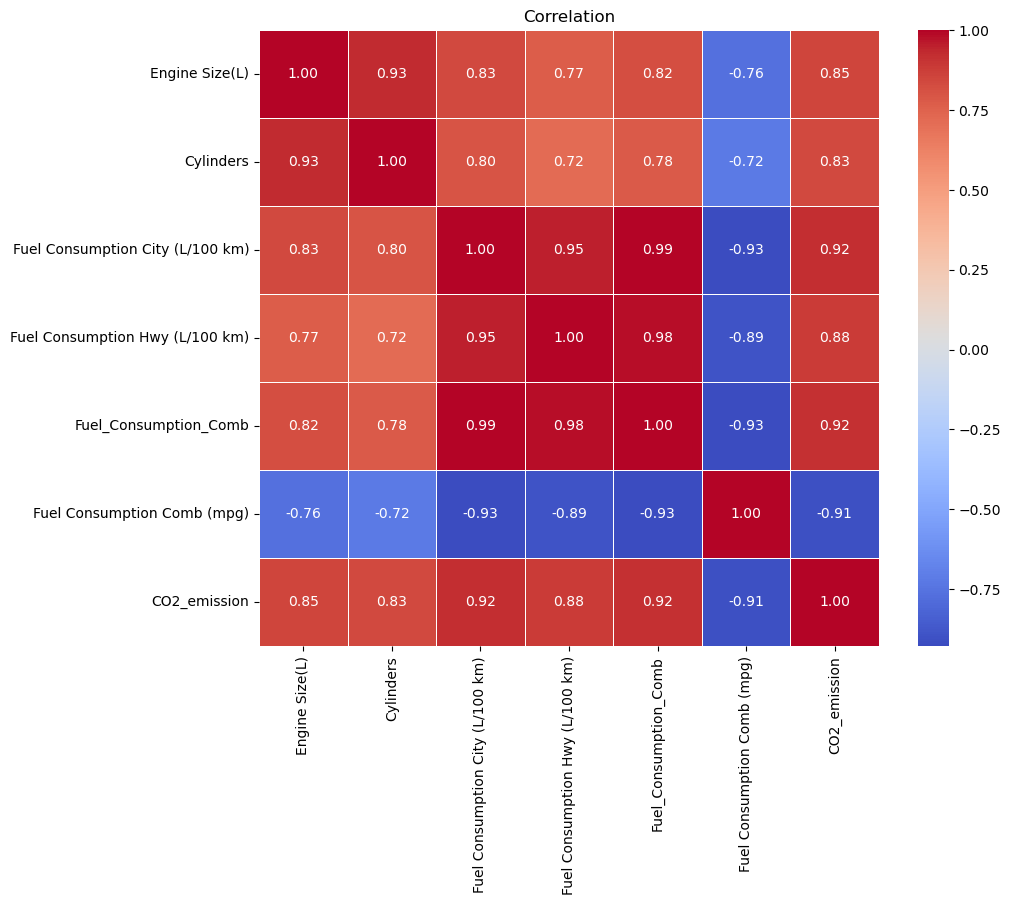

In [ ]:
# VISUALISATIONS

corr = data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

1. Fuel Consumption Comb (mpg) is negatively correlated to all the features.
2. All the other features are postively correlated with each other.
3. Both Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation of 0.99 and 0.98 with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.
4. Our dependent variable CO2 Emissions(g/km) has highest positive correlation of 0.92 with Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) and strong negative correlation of -0.91 with Fuel Consumption Comb (mpg).

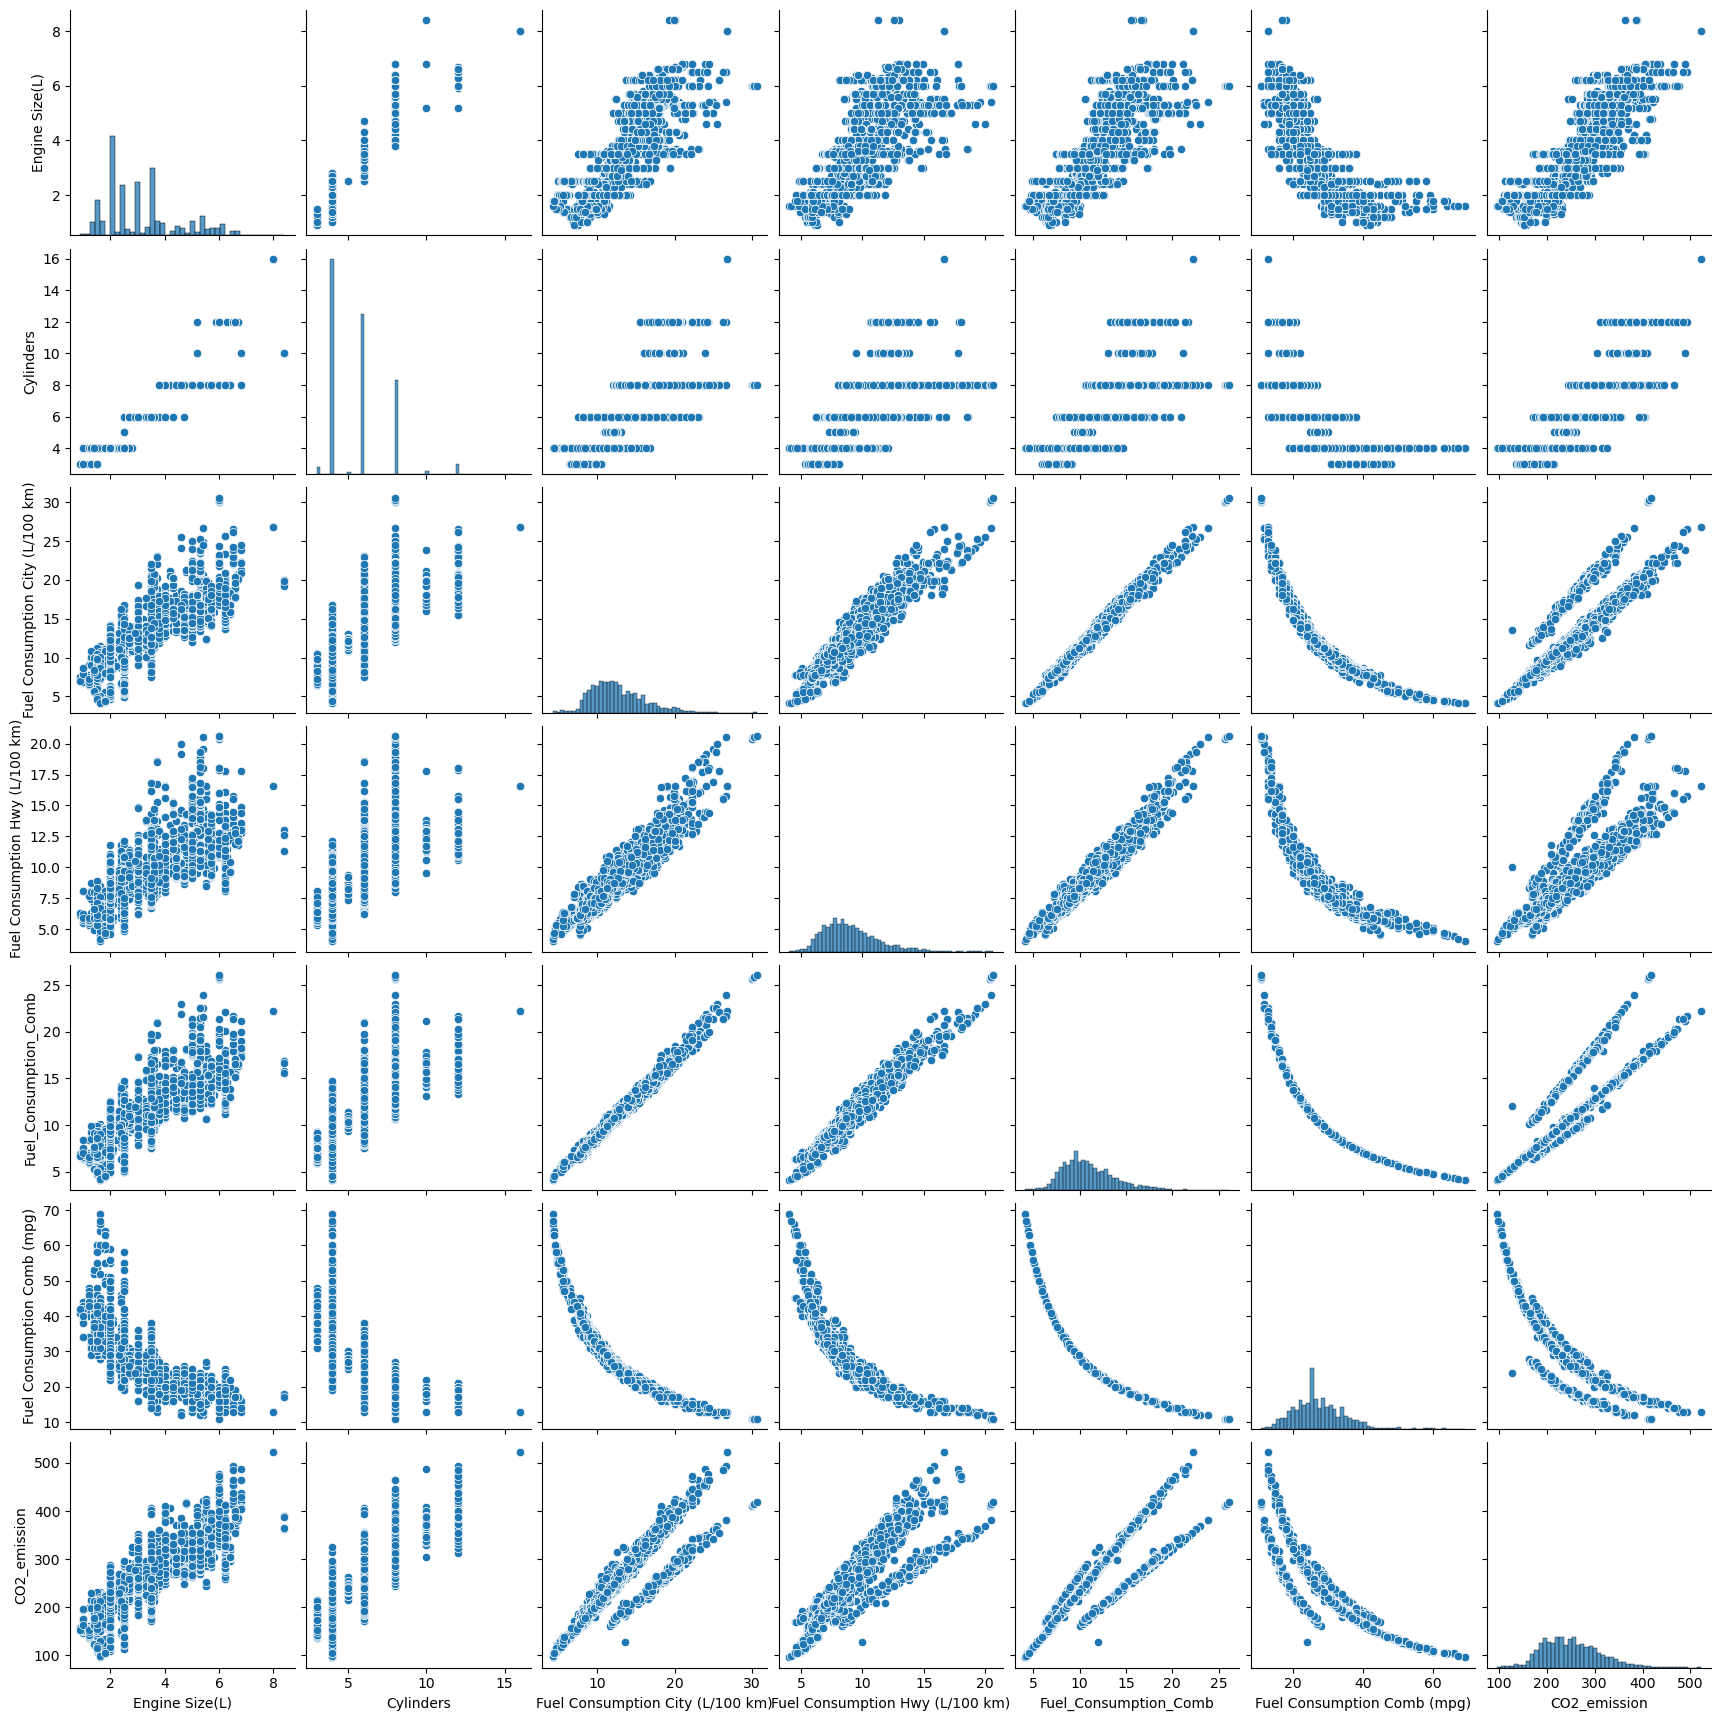

In [ ]:
sns.pairplot(data)

array([[<Axes: title={'center': 'Engine Size(L)'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Fuel Consumption City (L/100 km)'}>],
       [<Axes: title={'center': 'Fuel Consumption Hwy (L/100 km)'}>,
        <Axes: title={'center': 'Fuel_Consumption_Comb'}>,
        <Axes: title={'center': 'Fuel Consumption Comb (mpg)'}>],
       [<Axes: title={'center': 'CO2_emission'}>, <Axes: >, <Axes: >]],
      dtype=object)

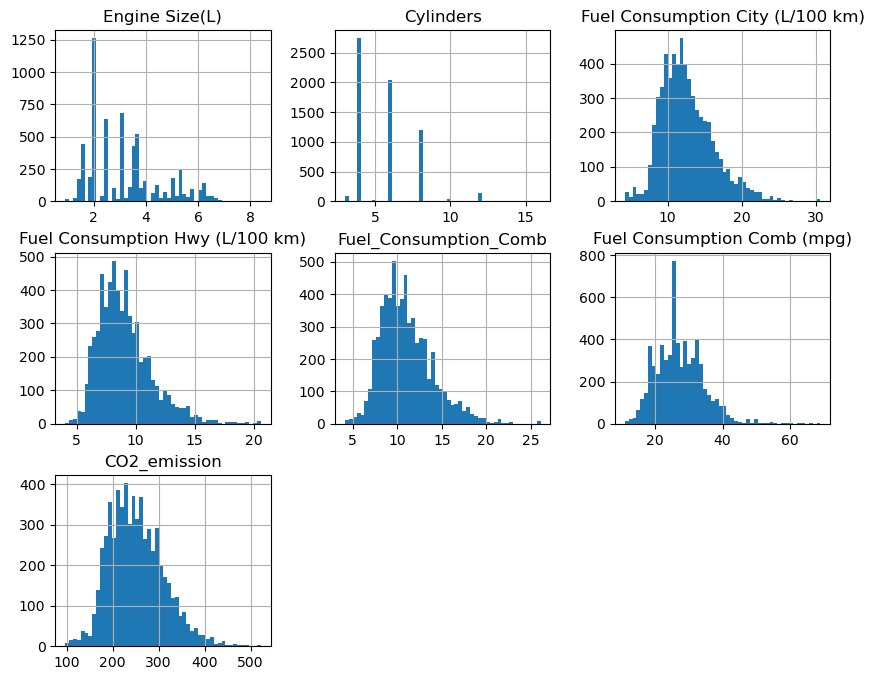

In [ ]:
# distribution of numerical features
# we can seee that the numerical features are little ight skewed.

data.hist(figsize=(10,8),bins=50)

In [ ]:
data.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4           AS   
1  ACURA         ILX       COMPACT             2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          CVT   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6           AS   

          Fuel Type  Fuel Consumption City (L/100 km)  \
0  Premium gasoline                               9.9   
1  Premium gasoline                              11.2   
2  Premium gasoline                               6.0   
3  Premium gasoline                              12.7   
4  Premium gasoline                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  CO2_emission  
0                           33           196  
1                           29           221  
2                           48           136  
3                           25           255  
4                           27           244

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
fig = go.Figure(data=go.Violin(y=data["Fuel Consumption City (L/100 km)"],
                               box_visible=True,
                               line_color='black',
                               meanline_visible=True,
                               fillcolor='purple', opacity=0.4,
                               x0='Fuel Consumption City (L/100 km)'))

fig.show()

## <font color='maroon'>FREQUENCY DISTRIBUTION OF DIFFFRENT FEATURES</font>

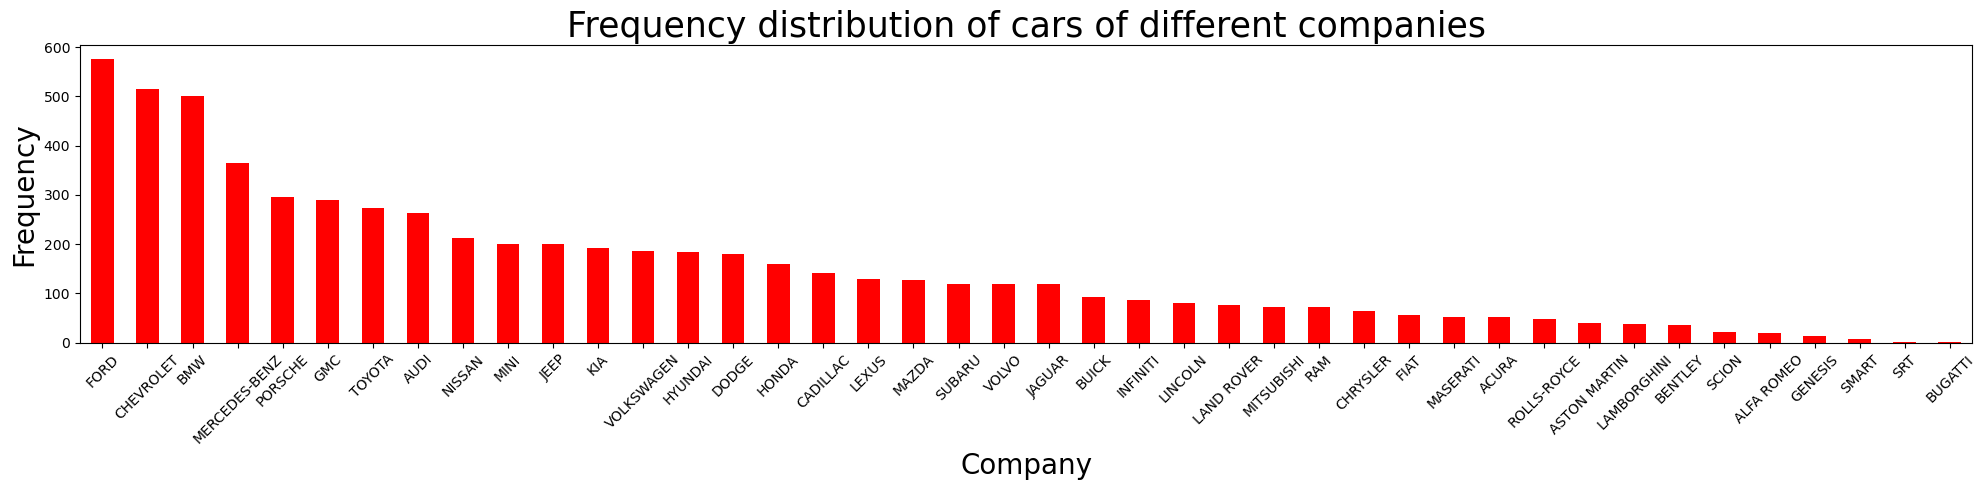

In [ ]:


# MAKE
plt.figure(figsize=(20,5))

data.groupby('Make')['Make'].count().sort_values(ascending=False).plot(kind='bar',color='red')

plt.title('Frequency distribution of cars of different companies', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

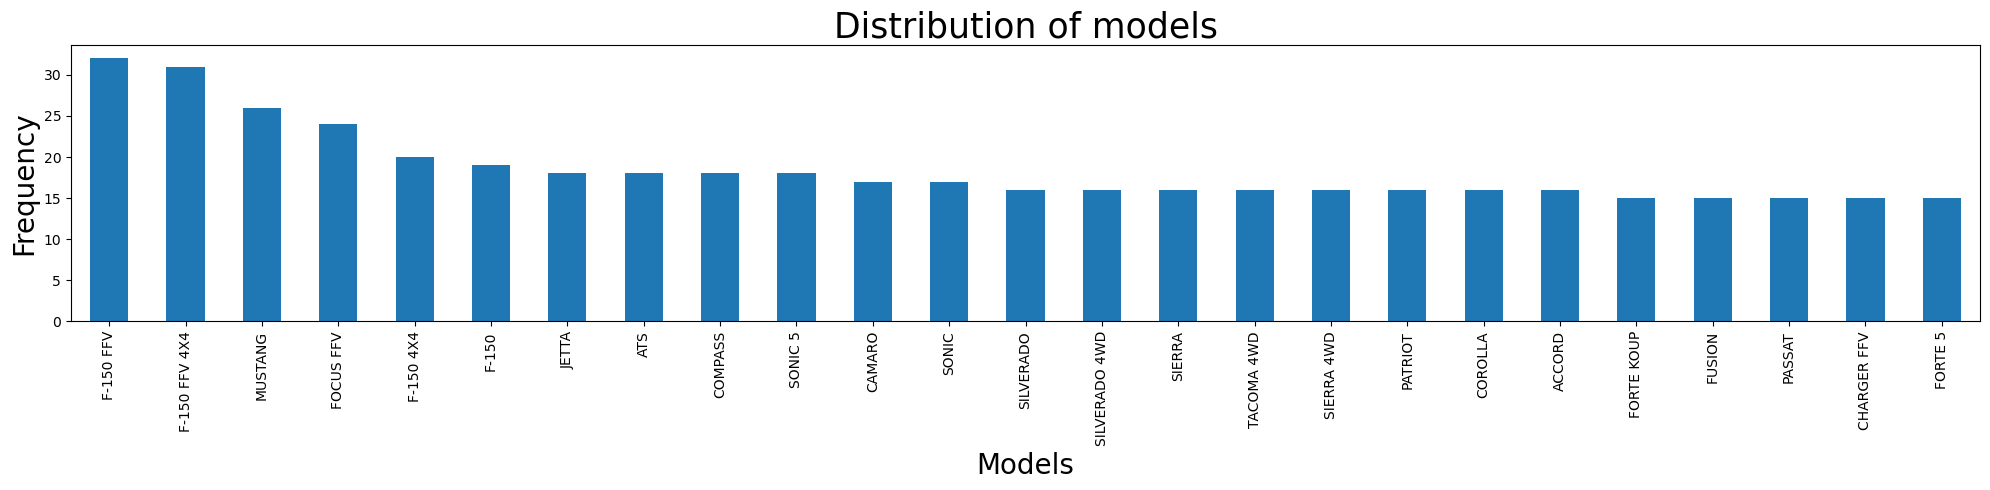

In [ ]:
# MODEL
plt.figure(figsize=(20,5))

data.groupby('Model')['Model'].count().sort_values(ascending=False)[:25].plot(kind='bar')

plt.title('Distribution of models', fontsize=25)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

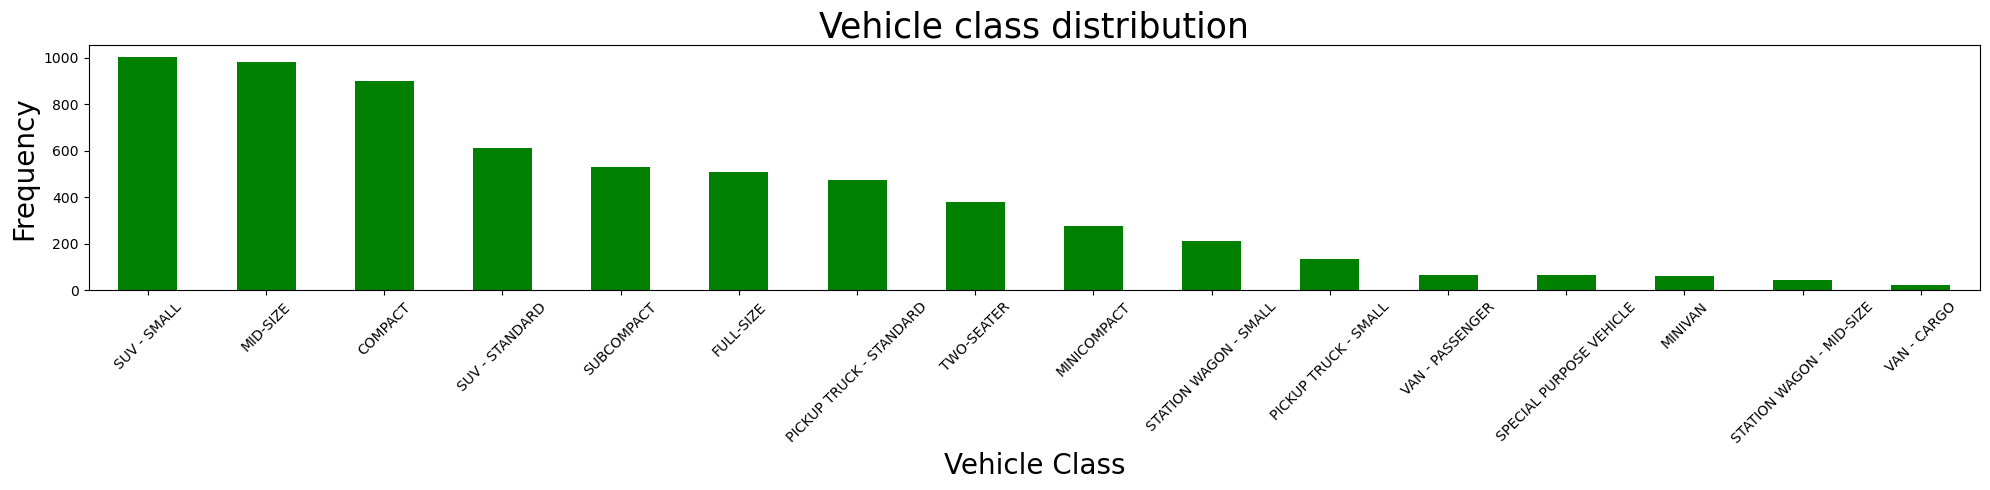

In [ ]:
# Vehicle Class

plt.figure(figsize=(20,5))

data.groupby('Vehicle Class')['Vehicle Class'].count().sort_values(ascending=False).plot(kind='bar', color='green')

plt.title('Vehicle class distribution', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

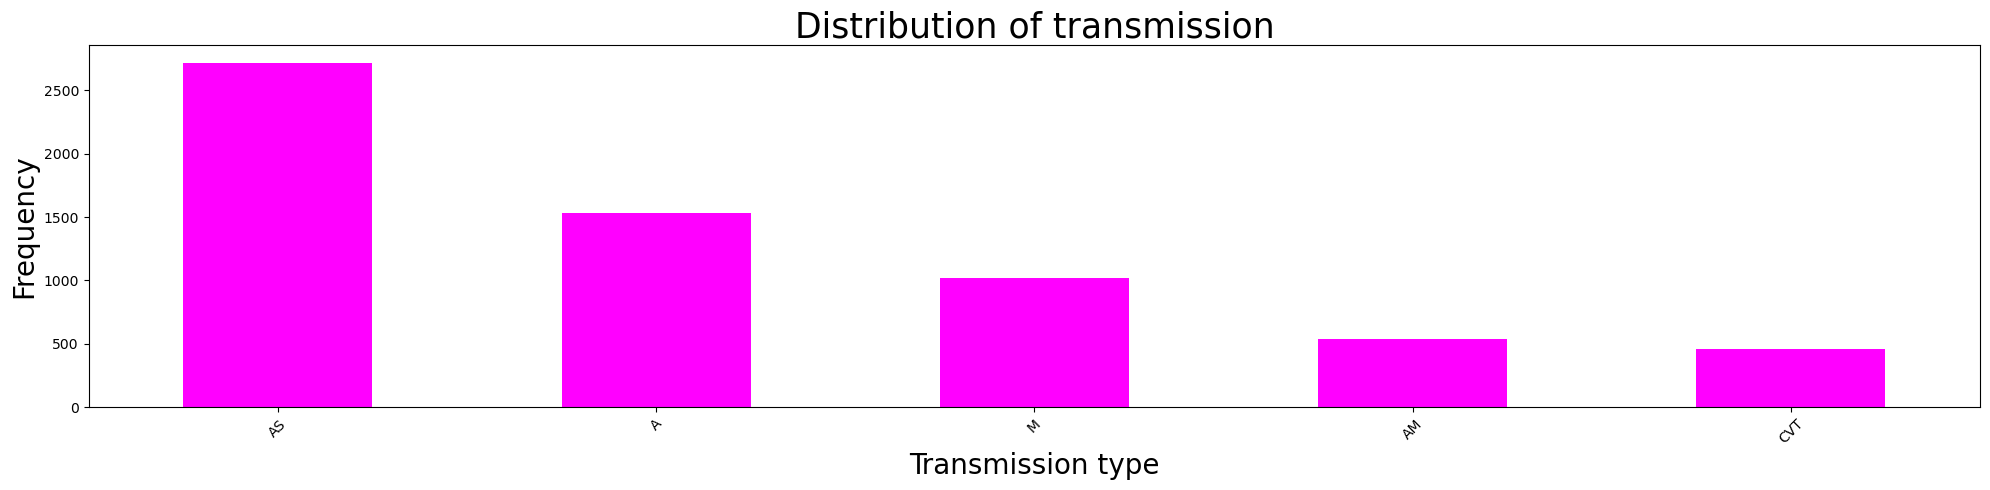

In [ ]:
# Transmission

plt.figure(figsize=(20,5))

data.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar', color='magenta')

plt.title('Distribution of transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
transmission_distr =data['Transmission'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='Transmission', names='index')
fig.update_layout(title="Transmission Distribution")
fig.show()

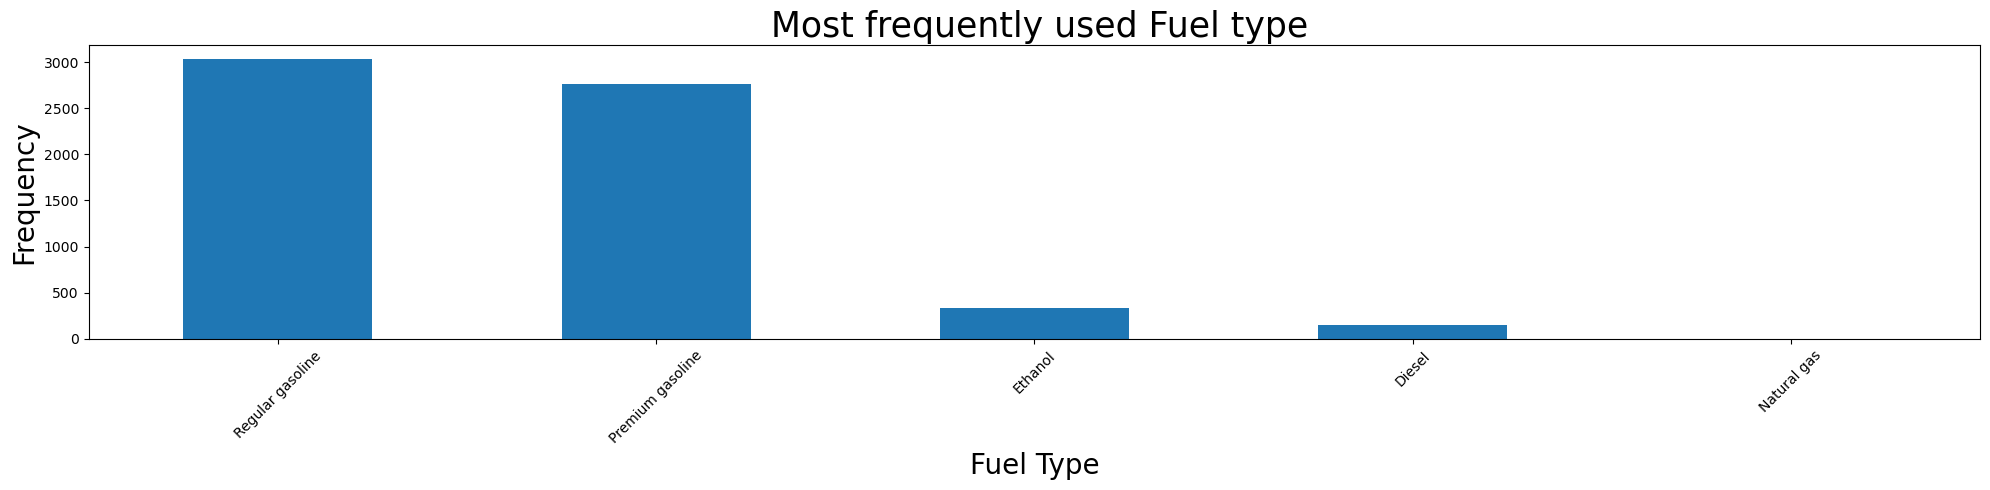

In [ ]:
# Fuel Type

plt.figure(figsize=(20,5))

data.groupby('Fuel Type')['Fuel Type'].count().sort_values(ascending=False).plot(kind='bar')

plt.title(' Most frequently used Fuel type', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

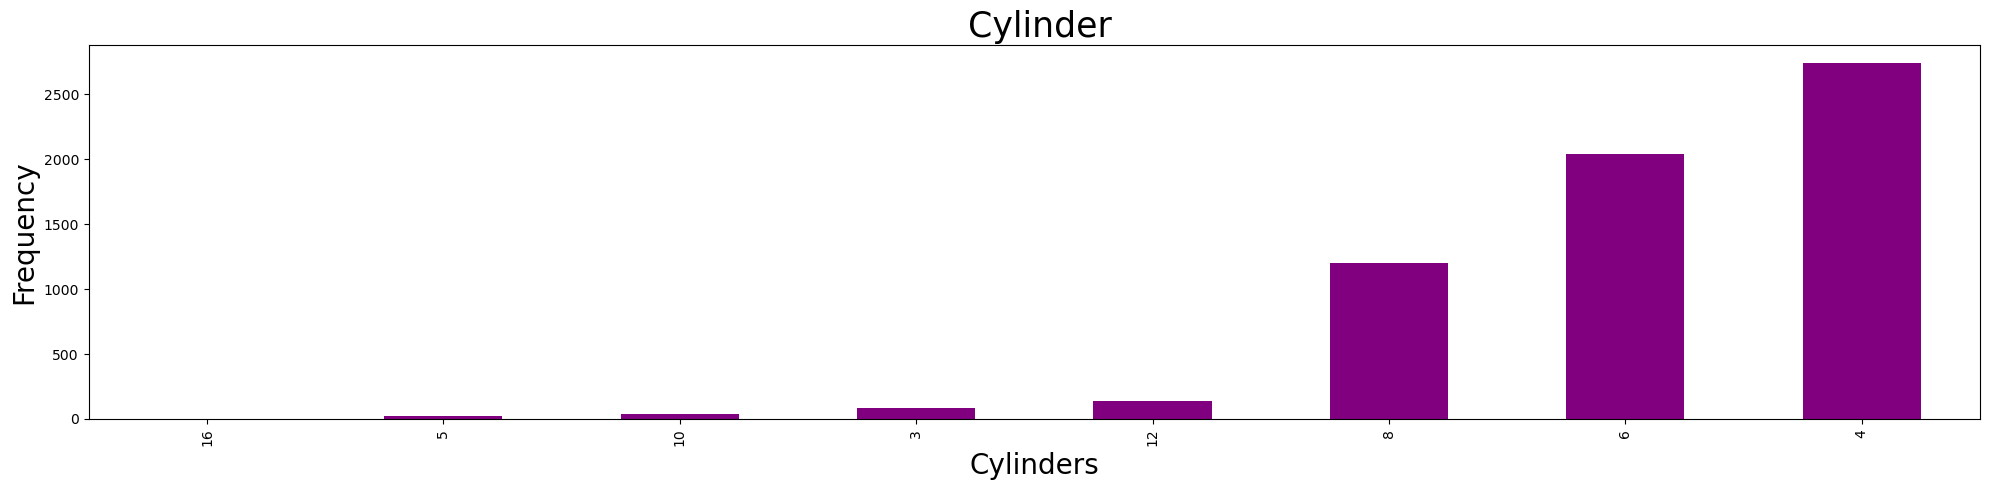

In [ ]:
# Cylinders

plt.figure(figsize=(20,5))

data.groupby('Cylinders')['Cylinders'].count().sort_values(ascending=True).plot(kind='bar', color='purple')

plt.title(' Cylinder', fontsize=25)
plt.xlabel('Cylinders', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
fig = px.histogram(data, x="Cylinders")
fig.update_layout(title_text='Cylinders in Vehicles',xaxis_title="Cylinders",yaxis_title="Number of vehicles " )
fig.show()

In [ ]:
cel =data['Cylinders'].value_counts().reset_index()
fig = px.pie(cel, values='Cylinders', names='index')
fig.update_layout(title="Cylinders")
fig.show()


## <font color='maroon'> FEATURE DISTRIBUTION WITH RESPECT TO CO2 EMISSION</font>

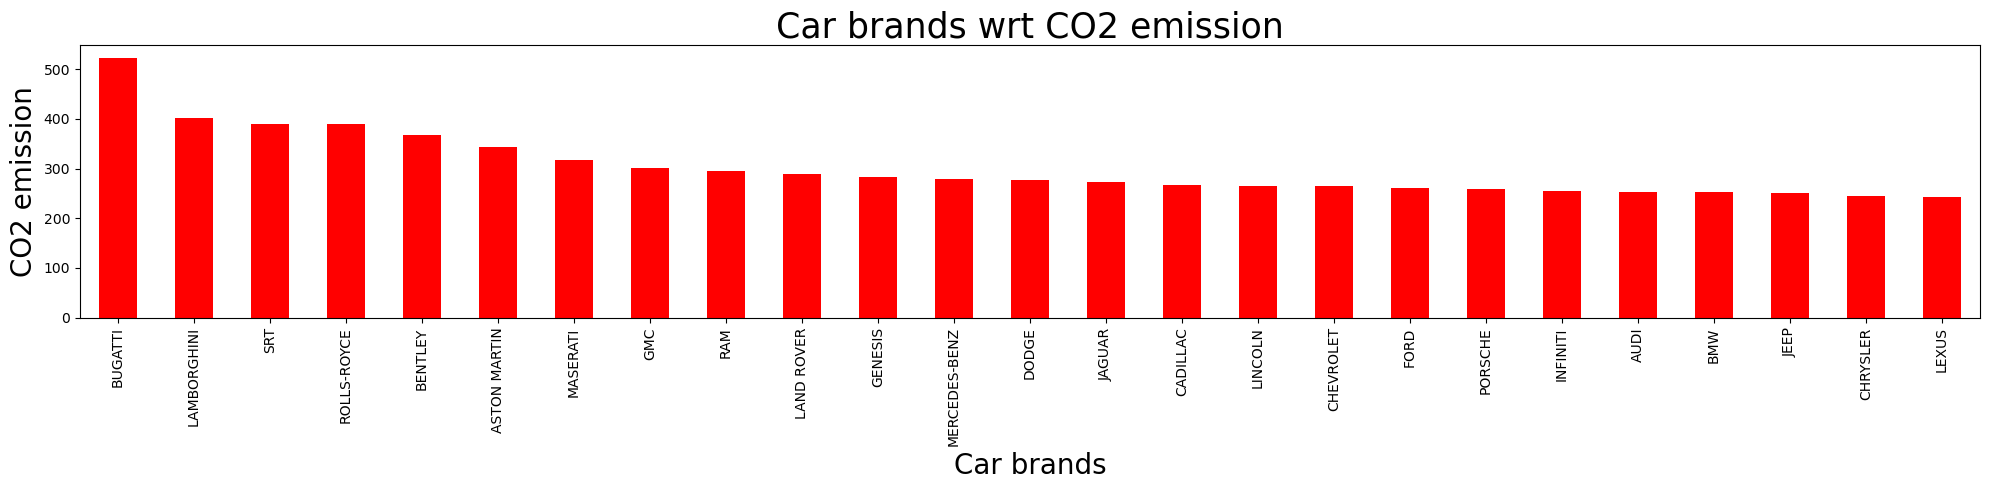

In [ ]:
# Visualisation wrt CO2 emision

plt.figure(figsize=(20,5))

data.groupby('Make')['CO2_emission'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')

plt.title('Car brands wrt CO2 emission', fontsize=25)
plt.xlabel('Car brands', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

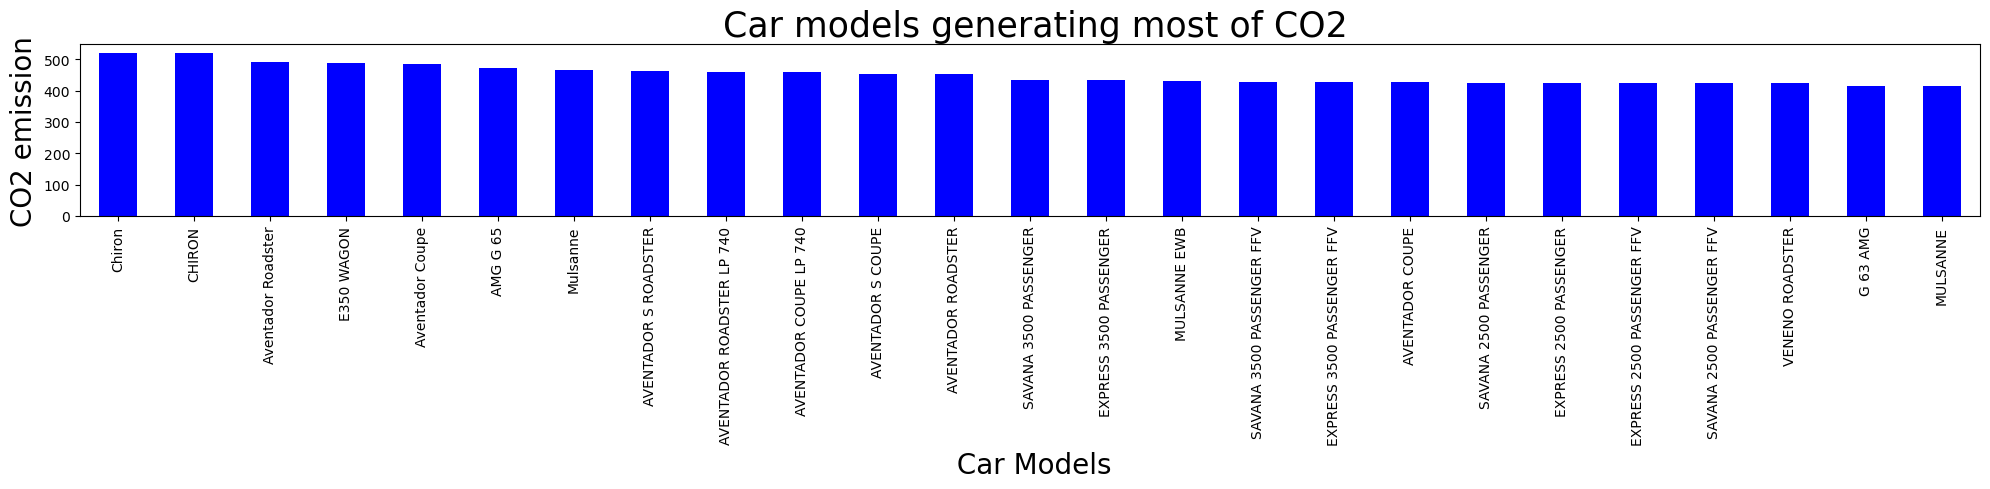

In [ ]:
plt.figure(figsize=(20,5))

data.groupby('Model')['CO2_emission'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='blue')

plt.title(' Car models generating most of CO2', fontsize=25)
plt.xlabel(' Car Models', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

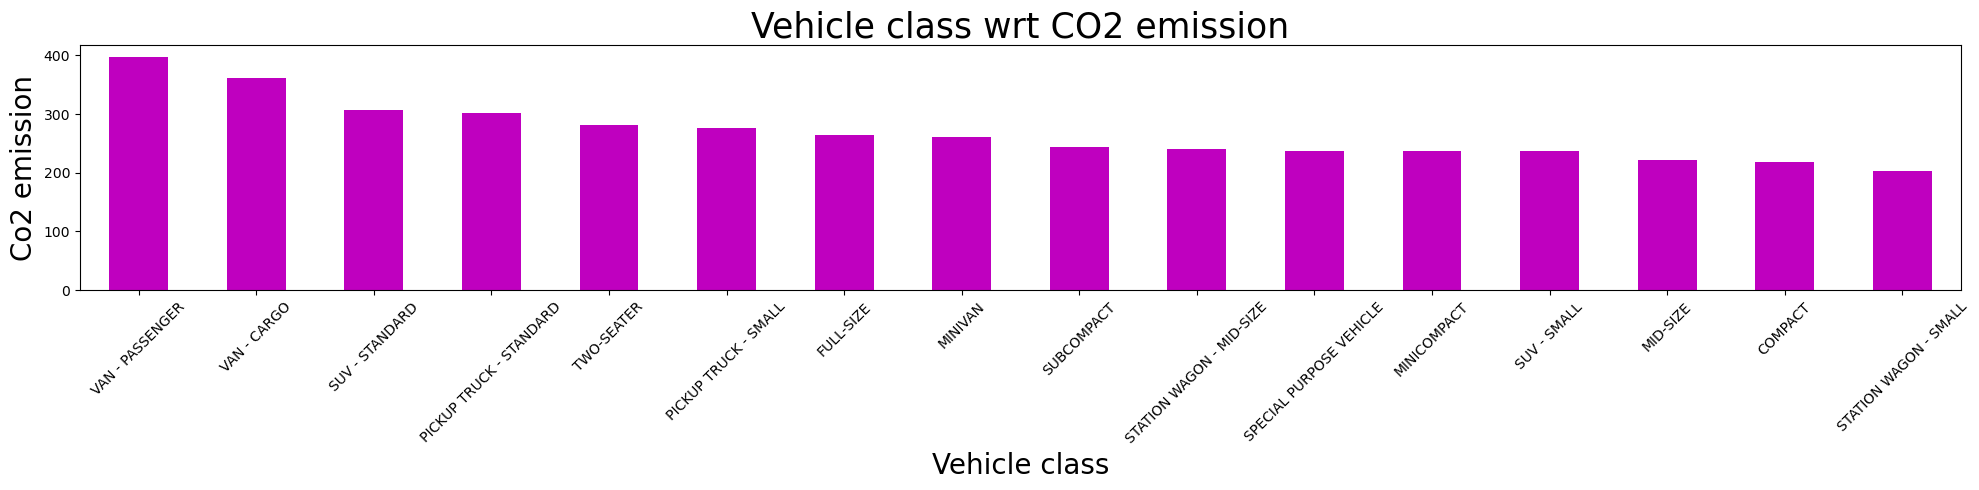

In [ ]:
plt.figure(figsize=(20,5))

data.groupby('Vehicle Class')['CO2_emission'].mean().sort_values(ascending=False).plot(kind='bar',color='m')

plt.title('Vehicle class wrt CO2 emission', fontsize=25)
plt.xlabel('Vehicle class' , fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

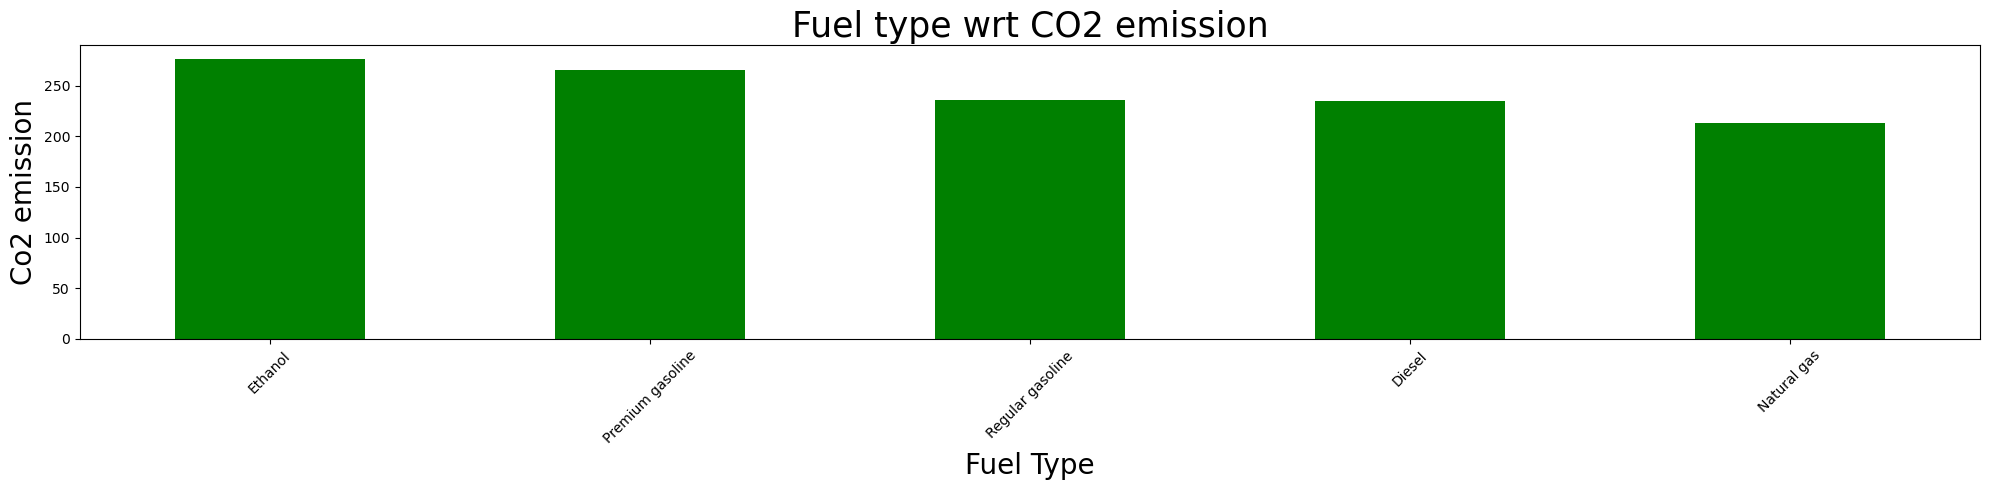

In [ ]:
plt.figure(figsize=(20,5))

data.groupby('Fuel Type')['CO2_emission'].mean().sort_values(ascending=False).plot(kind='bar',color='g')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

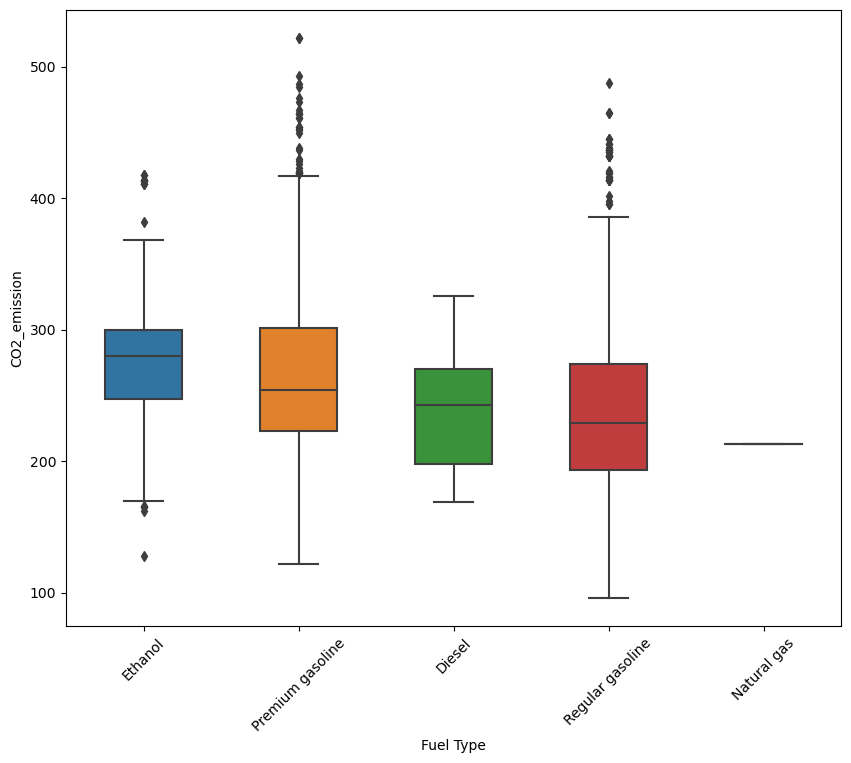

In [ ]:

fuel_type = data.groupby('Fuel Type')['CO2_emission'].median().sort_values(ascending=False).index
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Fuel Type', y='CO2_emission', data =data, order=fuel_type, width=0.5)
plt.xticks(rotation=45, horizontalalignment='center')

plt.show()

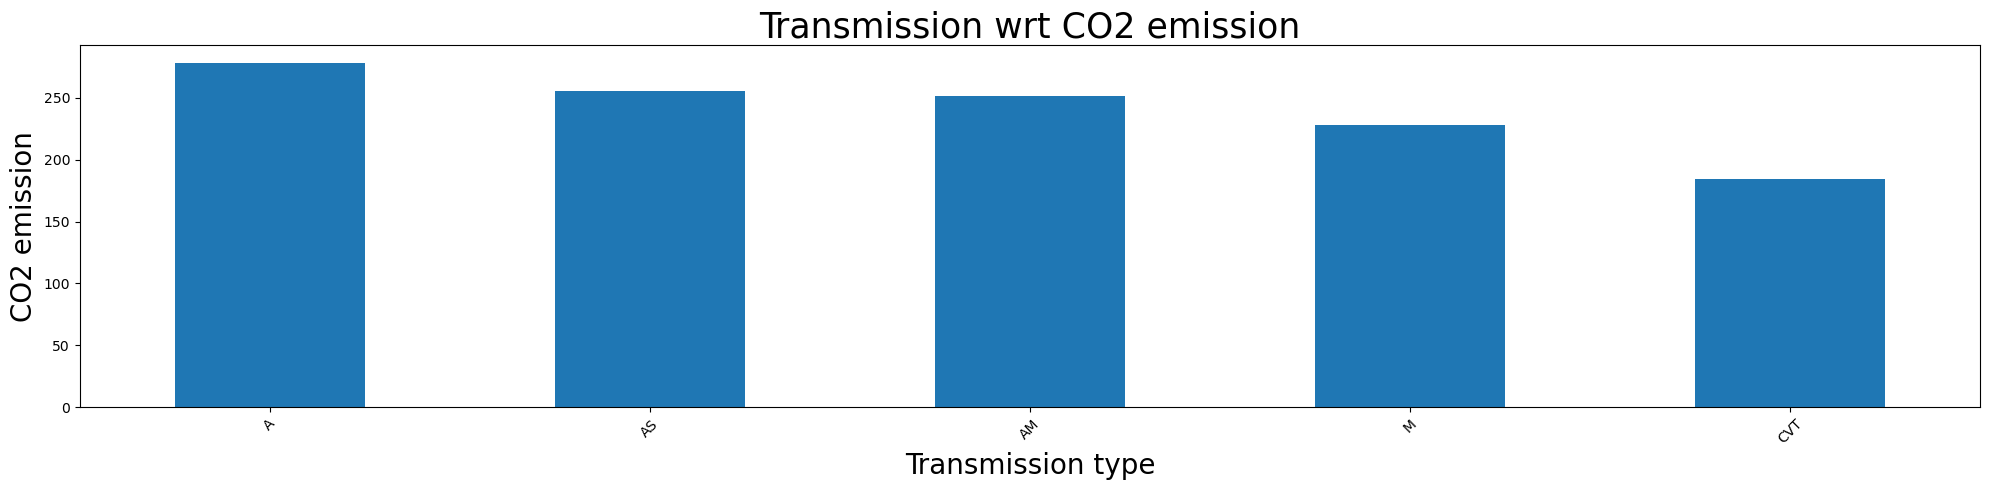

In [ ]:
plt.figure(figsize=(20,5))

data.groupby('Transmission')['CO2_emission'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Transmission wrt CO2 emission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

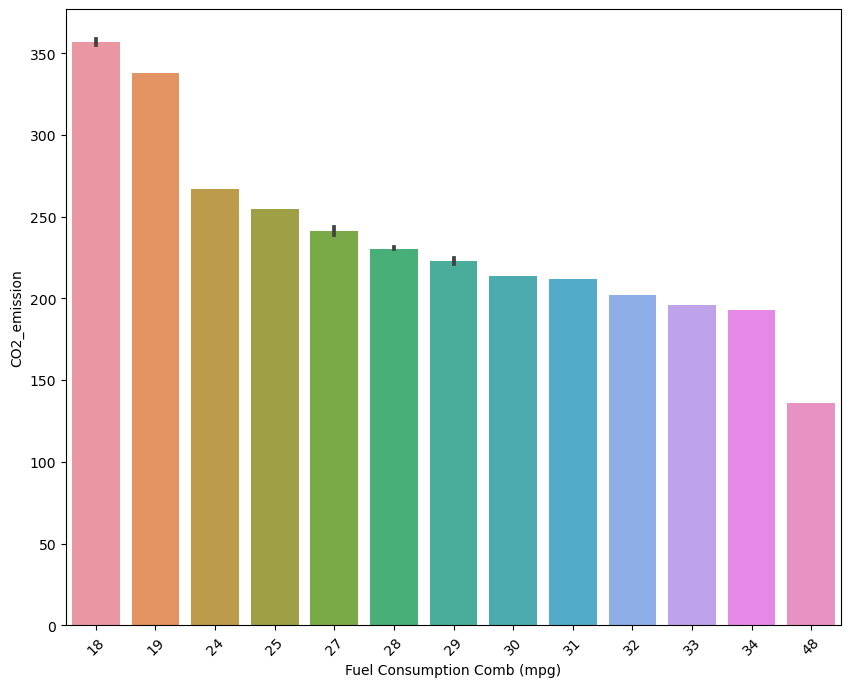

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Fuel Consumption Comb (mpg)', y='CO2_emission', data =data[:25])

plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

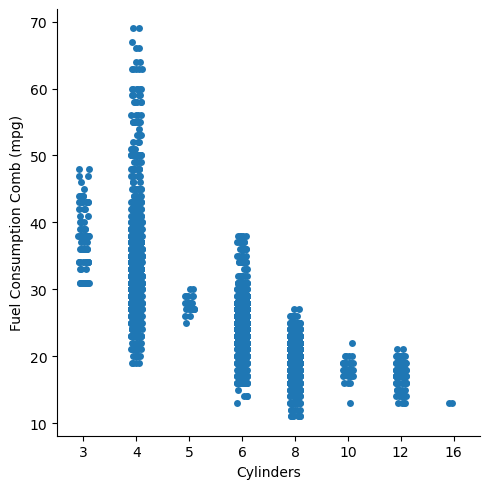

In [ ]:

plt.figure(figsize=(10,8))

sns.catplot(x='Cylinders', y='Fuel Consumption Comb (mpg)',data = data)

plt.show()

<Figure size 1000x800 with 0 Axes>

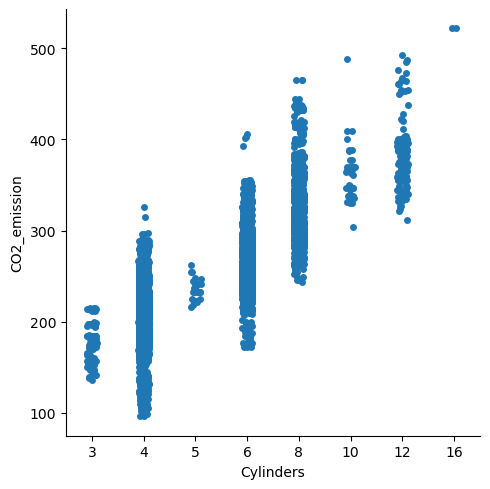

In [ ]:
plt.figure(figsize=(10,8))

sns.catplot(x='Cylinders', y='CO2_emission',data = data)

plt.show()                                # co2 emission increases with increasing no of cylinders

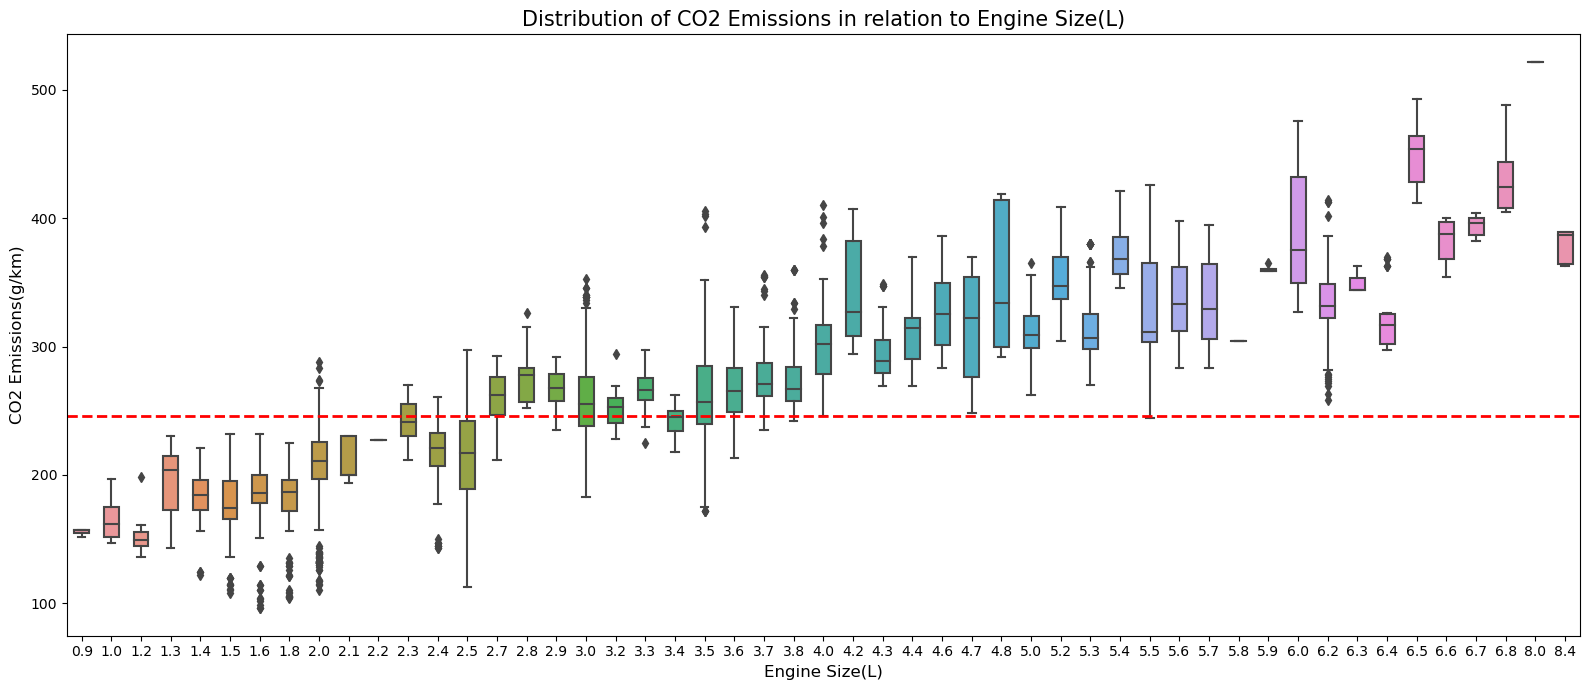

In [ ]:
plt.figure(figsize=(16,7))
order = data.groupby("Engine Size(L)")["CO2_emission"]
sns.boxplot(x="Engine Size(L)", y="CO2_emission", data=data, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(data["CO2_emission"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

1. From both the bar graph and the box plot it can be inferred that average CO2 emissions of cars belonging to the brand Bugatti is the highest and cars of SMART has the lowest emissions.
2. The red line signify the sample mean of CO2 emissions.
3. Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.

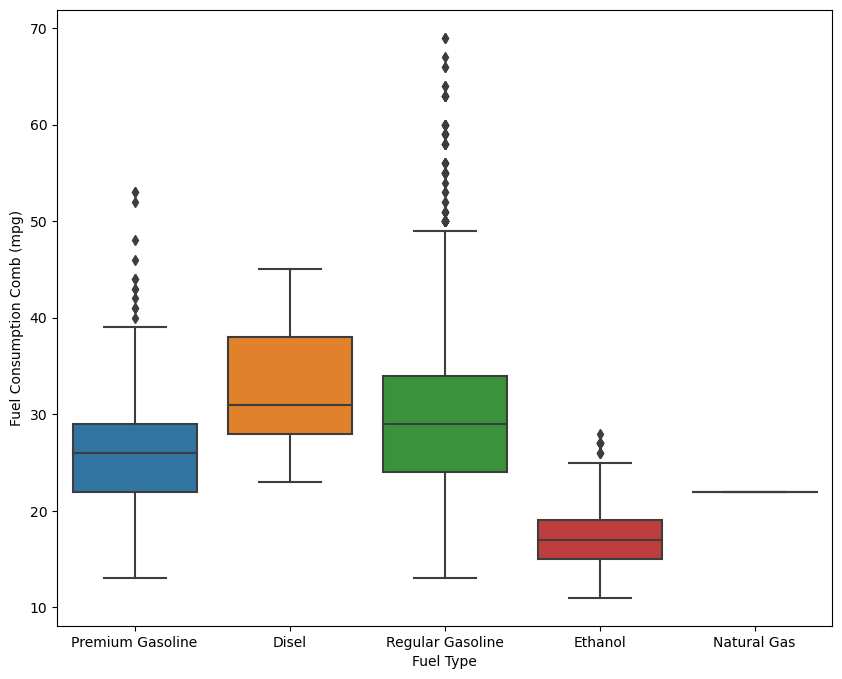

In [ ]:

plt.figure(figsize=(10,8))
sns.boxplot(x = 'Fuel Type', y='Fuel Consumption Comb (mpg)', data =data)

plt.xticks([0,1,2,3,4],['Premium Gasoline','Disel', 'Regular Gasoline','Ethanol', 'Natural Gas'])
plt.show()                           # efficiency of fuel

### <font color='maroon'> Removing the outliers </font>

In [ ]:
from scipy import stats

df = data.corr()[(np.abs(stats.zscore(data.corr())) < 1.9).all(axis=1)]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\1671815473.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df.reset_index(drop=True, inplace=True)


## <font color='maroon'>  DATA PREPROCESSING </font>

In [ ]:
# DATA PREPROCESSING

data.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4           AS   
1  ACURA         ILX       COMPACT             2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          CVT   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6           AS   

          Fuel Type  Fuel Consumption City (L/100 km)  \
0  Premium gasoline                               9.9   
1  Premium gasoline                              11.2   
2  Premium gasoline                               6.0   
3  Premium gasoline                              12.7   
4  Premium gasoline                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  CO2_emission  
0                           33           196  
1                           29           221  
2                           48           136  
3                           25           255  
4                           27           244

In [ ]:
data['Transmission'].value_counts()

AS     2720
A      1536
M      1019
AM      540
CVT     458
Name: Transmission, dtype: int64

In [ ]:
data['Fuel Type'].value_counts()

Regular gasoline    3030
Premium gasoline    2765
Ethanol              330
Diesel               147
Natural gas            1
Name: Fuel Type, dtype: int64

In [ ]:
# Dropping natural gas as there is only one data we have which would not make much difference in modelling

data_N = data[data['Fuel Type']== 'Natural gas']

ind = data_N.index

data_N

Make             Model Vehicle Class  Engine Size(L)  Cylinders  \
2439  CHEVROLET  IMPALA DUAL FUEL      MID-SIZE             3.6          6   

     Transmission    Fuel Type  Fuel Consumption City (L/100 km)  \
2439           AS  Natural gas                              15.2   

      Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
2439                              9.5                   12.7   

      Fuel Consumption Comb (mpg)  CO2_emission  
2439                           22           213

In [ ]:
for i in ind:
    data.drop(i, axis=0, inplace=True)

In [ ]:
data[data['Fuel Type']=='Natural gas']

Empty DataFrame
Columns: [Make, Model, Vehicle Class, Engine Size(L), Cylinders, Transmission, Fuel Type, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel_Consumption_Comb, Fuel Consumption Comb (mpg), CO2_emission]
Index: []

In [ ]:
# creating dummy variables of fuel type and transmission (catagorical features)

d_v =pd.get_dummies(data['Fuel Type'], prefix='Fuel', drop_first=True)
dv = pd.get_dummies(data["Transmission"], drop_first=True)
d_v.head()


Fuel_Ethanol  Fuel_Premium gasoline  Fuel_Regular gasoline
0             0                      1                      0
1             0                      1                      0
2             0                      1                      0
3             0                      1                      0
4             0                      1                      0

In [ ]:
dv.head()

AM  AS  CVT  M
0   0   1    0  0
1   0   0    0  1
2   0   0    1  0
3   0   1    0  0
4   0   1    0  0

In [ ]:
df = [data, d_v,dv]

data1 = pd.concat(df, axis=1)
data1.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4           AS   
1  ACURA         ILX       COMPACT             2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          CVT   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6           AS   

          Fuel Type  Fuel Consumption City (L/100 km)  \
0  Premium gasoline                               9.9   
1  Premium gasoline                              11.2   
2  Premium gasoline                               6.0   
3  Premium gasoline                              12.7   
4  Premium gasoline                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  CO2_emission  Fuel_Ethanol  \
0                           33           196             0   
1                           29           221             0   
2                           48           136             0   
3                           25           255             0   
4                           27           244             0   

   Fuel_Premium gasoline  Fuel_Regular gasoline  AM  AS  CVT  M  
0                      1                      0   0   1    0  0  
1                      1                      0   0   0    0  1  
2                      1                      0   0   0    1  0  
3                      1                      0   0   1    0  0  
4                      1                      0   0   1    0  0

In [ ]:
data1.drop(['Fuel Type'], inplace=True, axis=1)
data1.drop(['Transmission'], inplace=True, axis=1)




## <font color='green'> HANDLING OTHER CATAGORICAL FEATURES HAVING MULTIPLE CATAGORIES (MAKE , MODEL, VEHICLE CLASS) </font>

In [ ]:
df_freq = data1['Make'].value_counts().to_dict()
mod_freq = data1['Model'].value_counts().to_dict()
veh_freq = data1['Vehicle Class'].value_counts().to_dict()

In [ ]:
data1['Make'] = data1['Make'].map(df_freq)
data1['Model'] = data1['Model'].map(mod_freq)
data1['Vehicle Class'] = data1['Vehicle Class'].map(veh_freq)

In [ ]:
data1.head()

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  \
0    51      7            902             2.0          4   
1    51      7            902             2.4          4   
2    51      2            902             1.5          4   
3    51      1           1004             3.5          6   
4    51      4           1004             3.5          6   

   Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                               9.9                              6.7   
1                              11.2                              7.7   
2                               6.0                              5.8   
3                              12.7                              9.1   
4                              12.1                              8.7   

   Fuel_Consumption_Comb  Fuel Consumption Comb (mpg)  CO2_emission  \
0                    8.5                           33           196   
1                    9.6                           29           221   
2                    5.9                           48           136   
3                   11.1                           25           255   
4                   10.6                           27           244   

   Fuel_Ethanol  Fuel_Premium gasoline  Fuel_Regular gasoline  AM  AS  CVT  M  
0             0                      1                      0   0   1    0  0  
1             0                      1                      0   0   0    0  1  
2             0                      1                      0   0   0    1  0  
3             0                      1                      0   0   1    0  0  
4             0                      1                      0   0   1    0  0


## <font color='maroon'> DIVIDING DATA SET INTO INDEPENDENT AND DEPENDENT VARIABLE </font>

In [ ]:
X = data1.drop('CO2_emission', axis=1)
y = data1['CO2_emission']

In [ ]:
X.head()


Make  Model  Vehicle Class  Engine Size(L)  Cylinders  \
0    51      7            902             2.0          4   
1    51      7            902             2.4          4   
2    51      2            902             1.5          4   
3    51      1           1004             3.5          6   
4    51      4           1004             3.5          6   

   Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                               9.9                              6.7   
1                              11.2                              7.7   
2                               6.0                              5.8   
3                              12.7                              9.1   
4                              12.1                              8.7   

   Fuel_Consumption_Comb  Fuel Consumption Comb (mpg)  Fuel_Ethanol  \
0                    8.5                           33             0   
1                    9.6                           29             0   
2                    5.9                           48             0   
3                   11.1                           25             0   
4                   10.6                           27             0   

   Fuel_Premium gasoline  Fuel_Regular gasoline  AM  AS  CVT  M  
0                      1                      0   0   1    0  0  
1                      1                      0   0   0    0  1  
2                      1                      0   0   0    1  0  
3                      1                      0   0   1    0  0  
4                      1                      0   0   1    0  0

In [ ]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2_emission, dtype: int64

In [ ]:
data1.shape

(6272, 17)

####  feature selection
- Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset and then applying machine learning algorithms for the better performance of the model.
- A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.


## <font color='green'>FEATURE SELECTION USING CHI-SQUARE TEST </font>

- Chi-square test is used for categorical features in a dataset.
- We calculate Chi-square between each feature and the target and select the desired number of features with best Chi-square scores.
- It determines if the association between two categorical variables of the sample would reflect their real association in the population.
 ![image.png](attachment:image.png)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ranked_feature = SelectKBest(score_func = chi2, k='all')
ordered_feature = ranked_feature.fit(X, y)


In [ ]:
top_feat = pd.DataFrame(ordered_feature.scores_ , columns=['score'])
top_feat['variables'] = X.columns

In [ ]:
top_feat.sort_values(by='score', ascending=False)

score                         variables
2   132330.414488                     Vehicle Class
0    79299.126142                              Make
8    11231.501210       Fuel Consumption Comb (mpg)
5     5417.291217  Fuel Consumption City (L/100 km)
7     4257.445200             Fuel_Consumption_Comb
4     2961.123754                         Cylinders
3     2936.647733                    Engine Size(L)
6     2924.863320   Fuel Consumption Hwy (L/100 km)
1     2218.880716                             Model
14    1593.655155                               CVT
12     798.527315                                AM
9      727.936590                      Fuel_Ethanol
15     643.535514                                 M
10     611.929512             Fuel_Premium gasoline
11     558.307546             Fuel_Regular gasoline
13     414.194278                                AS


## <font color='green'>  CREATING TRAINING SET AND TESTING SET </font>

In [ ]:
# splitting of traing testing set into X and y

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5017, 16)
(1255, 16)
(5017,)
(1255,)


In [ ]:
y_test.head()

3387    213
2088    242
3947    259
1853    306
5921    173
Name: CO2_emission, dtype: int64


## <font color='green'> FEATURE SCALING USING STANDARDIZATION  </font>

- This method of scaling is basically based on the central tendencies and variance of the data.

- First, we should calculate the mean and standard deviation of the data we would like to normalize.
- Then we are supposed to subtract the mean value from each entry and then divide the result by the standard deviation.
- This helps us achieve a normal distribution(if it is already normal but skewed) of the data with a mean equal to zero and   a standard deviation equal to 1.

 <font color='black'>![image.png](attachment:image.png)</font>

   X scaled=  xi-xmean/sigma

In [ ]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.25925568, -0.74921687,  1.03449562, ..., -0.87979842,
        -0.27928018, -0.44169322],
       [ 0.07517973,  0.02808159, -0.19778837, ..., -0.87979842,
        -0.27928018, -0.44169322],
       [-0.93306036,  0.41673082,  0.7725933 , ..., -0.87979842,
         3.58063355, -0.44169322],
       ...,
       [-0.5475568 , -0.36056764,  1.11508095, ...,  1.136624  ,
        -0.27928018, -0.44169322],
       [-0.88561376, -0.74921687,  0.7725933 , ...,  1.136624  ,
        -0.27928018, -0.44169322],
       [-0.3755629 , -0.16624302,  1.11508095, ..., -0.87979842,
         3.58063355, -0.44169322]])

In [ ]:
data1['CO2_emission'].mean()

251.25334821428572

In [ ]:
data1['CO2_emission'].std()

59.238150008846716

# <font color='darkpink'>MACHINE LEARNING ALGORITHM WE USED : </font>

## <font color='maroon'>  MODEL IMPLEMENTATION (Approach 1) </font>



## <font color='green'>LINEAR REGRESSION </font>

##### <font color='black'>The most basic regression algorithm which make predictions by simply computing weighted sum of input features adding a bias term. </font>


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
model.intercept_

250.6581622483556

In [ ]:
model.coef_

array([ 2.75669679e-02, -2.07349173e-02,  3.78423102e-02,  5.17293699e-01,
        2.04802831e+00,  2.55123993e+01,  1.36009024e+01,  1.90553095e+01,
       -6.85413819e+00, -3.05863909e+01, -1.53031654e+01, -1.50515882e+01,
        2.55841091e-01,  2.75716892e-02,  3.25470545e-02, -1.01589185e-01])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([212.48016749, 246.87870099, 255.12985365, ..., 183.26655685,
       296.41189484, 209.44469939])

In [ ]:


np.sqrt(mean_squared_error(y_test, y_pred))

5.2620245847535205

In [ ]:
r2_score(y_test, y_pred)

0.9923620994791071

In [ ]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [ ]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

pred_values  real_values
0          212.48        213.0
1          246.88        242.0
2          255.13        259.0
3          310.26        306.0
4          170.24        173.0
...           ...          ...
1250       221.16        220.0
1251       481.92        476.0
1252       183.27        184.0
1253       296.41        292.0
1254       209.44        205.0

[1255 rows x 2 columns]

In [ ]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])

print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  3.2045737051792833


In [ ]:
lin_pred.head(10)

pred_values  real_values  diff
0       212.48        213.0  0.52
1       246.88        242.0  4.88
2       255.13        259.0  3.87
3       310.26        306.0  4.26
4       170.24        173.0  2.76
5       294.91        290.0  4.91
6       329.03        332.0  2.97
7       173.14        173.0  0.14
8       233.33        233.0  0.33
9       256.36        256.0  0.36

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\3524681940.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CO2_emission', ylabel='Density'>

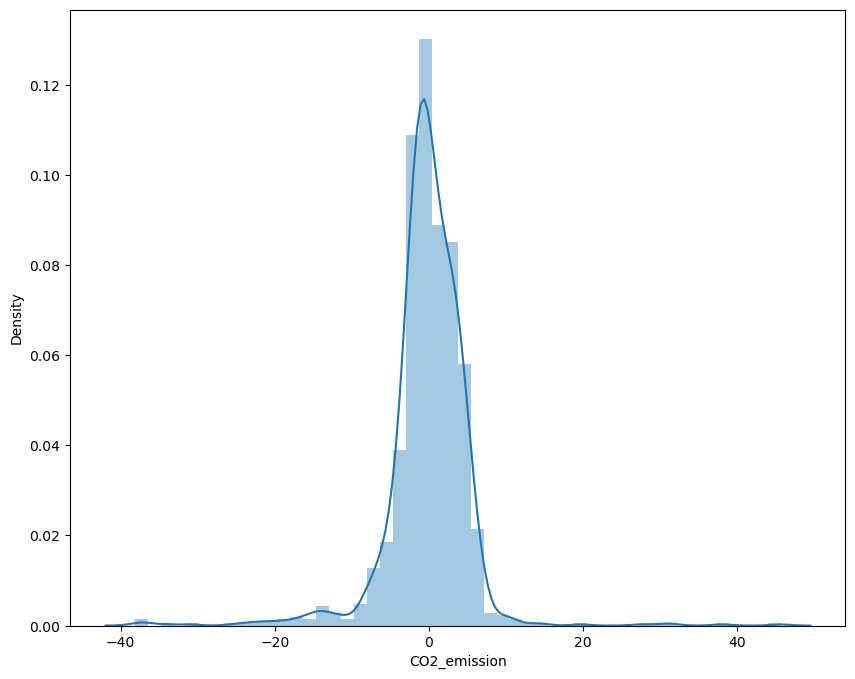

In [ ]:
sns.distplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

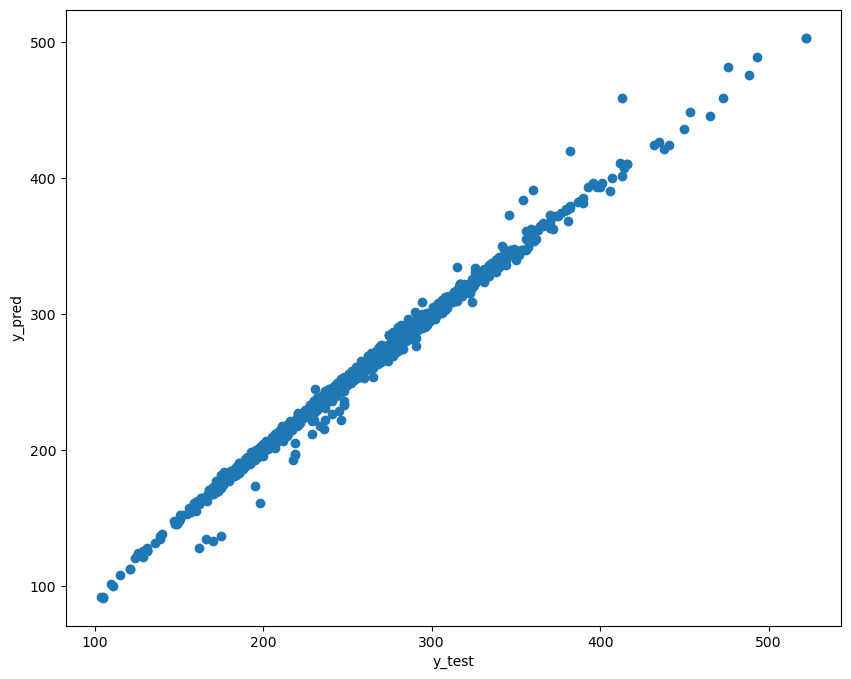

In [ ]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\2542628527.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




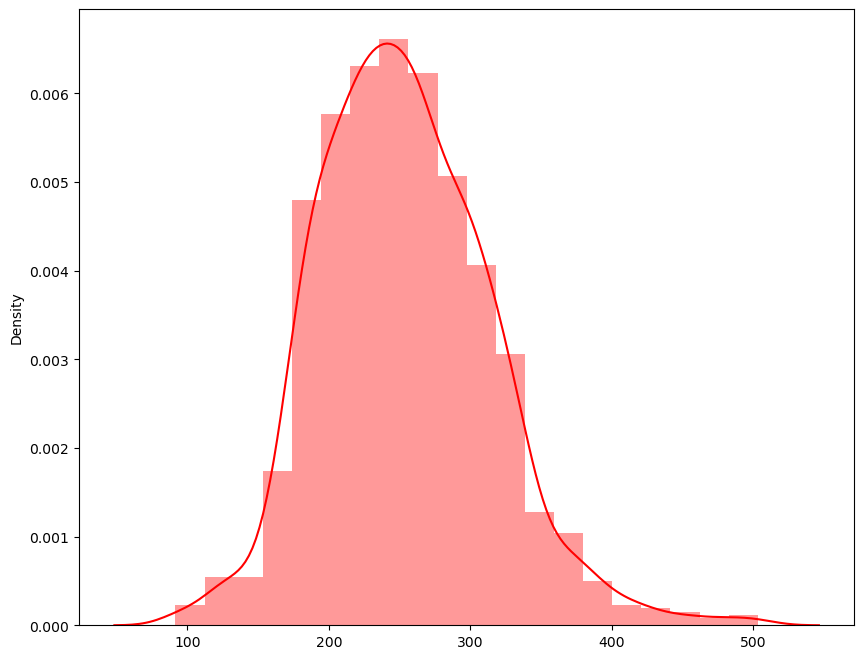

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\2542628527.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




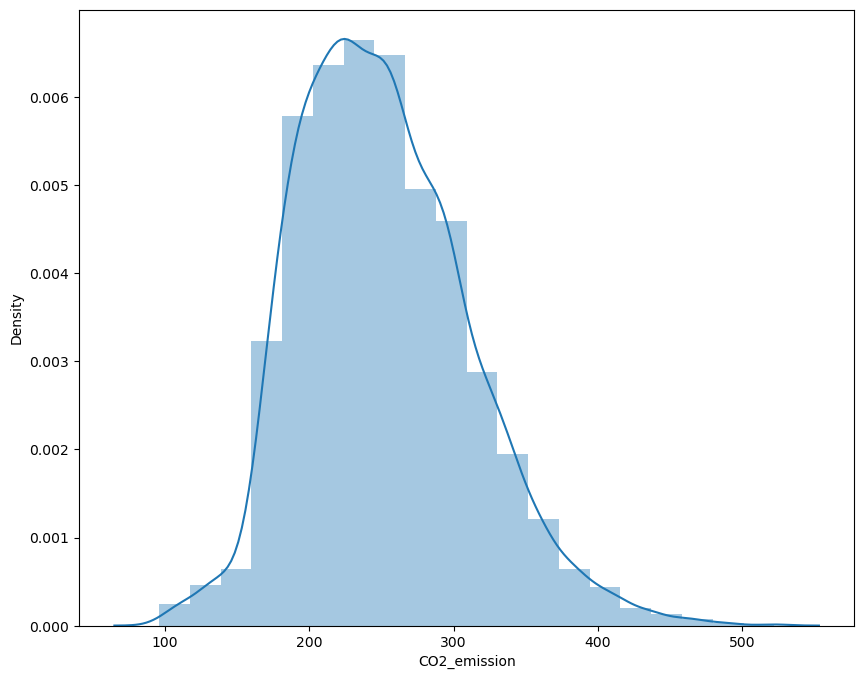

In [ ]:
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(data1['CO2_emission'], bins=20)
plt.show()


# <font color='green'>  LASSO REGRESSION</font>

- Least Absolute Shrinkage and Selection Operator Regression(Lasso) is a regularized version of linear regression which adds a regularization term to the cost function using l1 norm or Manhattan norm.
- LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

In [ ]:


model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
model.coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  5.78947212e-01,
        2.20184141e+00,  3.37903827e+01,  1.80448255e+01,  5.92758024e+00,
       -6.86155807e+00, -2.89843082e+01, -1.22985929e+01, -1.21204823e+01,
        1.04356372e-01, -0.00000000e+00, -1.30679796e-03, -9.67356771e-02])

In [ ]:
y_lasso_pred = model.predict(X_test)
y_lasso_pred

array([212.76372536, 246.8315485 , 254.91581187, ..., 183.06570611,
       296.38909438, 209.93699067])

In [ ]:
np.sqrt(mean_squared_error(y_test,y_lasso_pred ))

5.370201982329538

In [ ]:
r2_score(y_lasso_pred, y_test)

0.9919252255582924

In [ ]:
frames = [y_lasso_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

0      1
0     212.763725  213.0
1     246.831548  242.0
2     254.915812  259.0
3     310.438575  306.0
4     170.952977  173.0
...          ...    ...
1250  221.566496  220.0
1251  480.959356  476.0
1252  183.065706  184.0
1253  296.389094  292.0
1254  209.936991  205.0

[1255 rows x 2 columns]

In [ ]:
lasso_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
lasso_pred['pred_values'] = (lasso_pred['pred_values'].map(lambda x: round(x,2)))

lasso_pred['diff'] = abs(lasso_pred['real_values'] -lasso_pred['pred_values'])


print('mean diff: ', abs(lasso_pred['diff']).mean())

mean diff:  3.299760956175298


In [ ]:
lasso_pred.head(10)

pred_values  real_values  diff
0       212.76        213.0  0.24
1       246.83        242.0  4.83
2       254.92        259.0  4.08
3       310.44        306.0  4.44
4       170.95        173.0  2.05
5       295.00        290.0  5.00
6       329.07        332.0  2.93
7       173.77        173.0  0.77
8       233.78        233.0  0.78
9       256.49        256.0  0.49

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\287112299.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CO2_emission', ylabel='Density'>

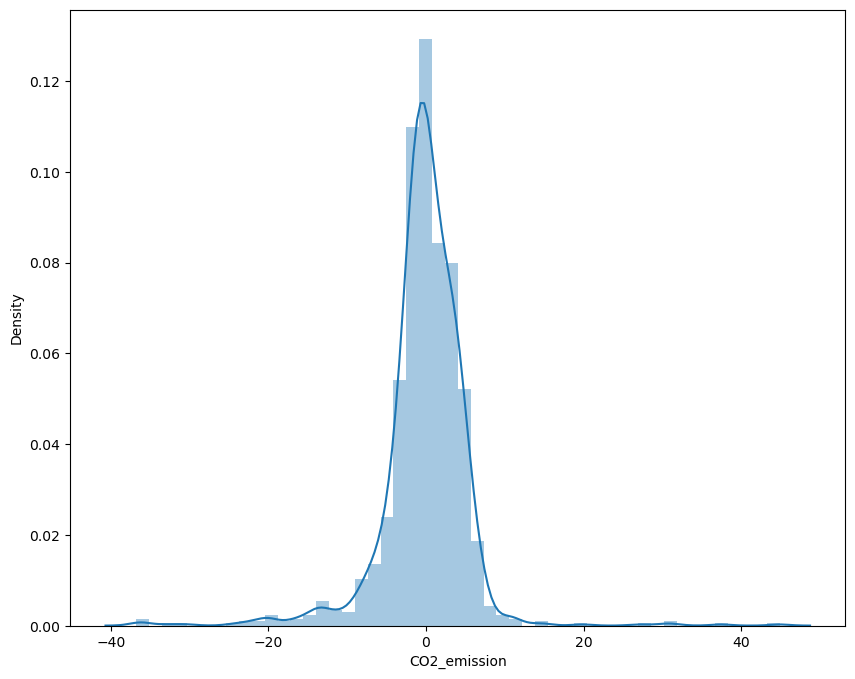

In [ ]:
sns.distplot(y_lasso_pred-y_test)

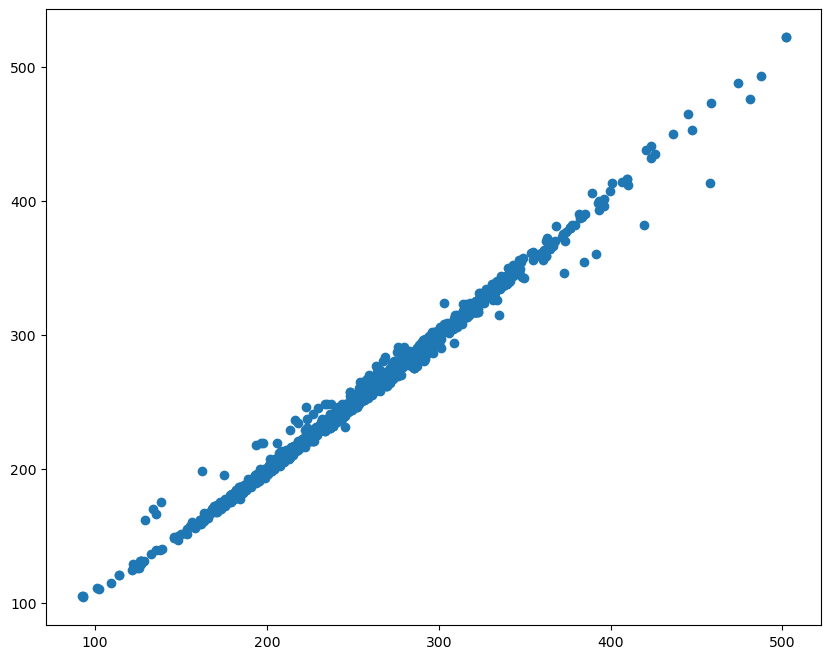

In [ ]:
plt.scatter(y_lasso_pred, y_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\533609663.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




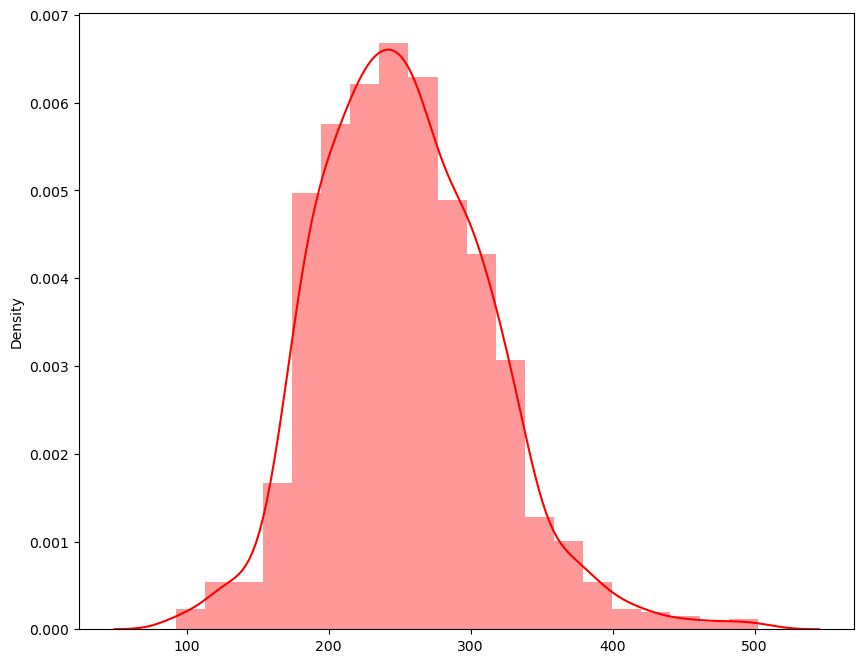

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\533609663.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




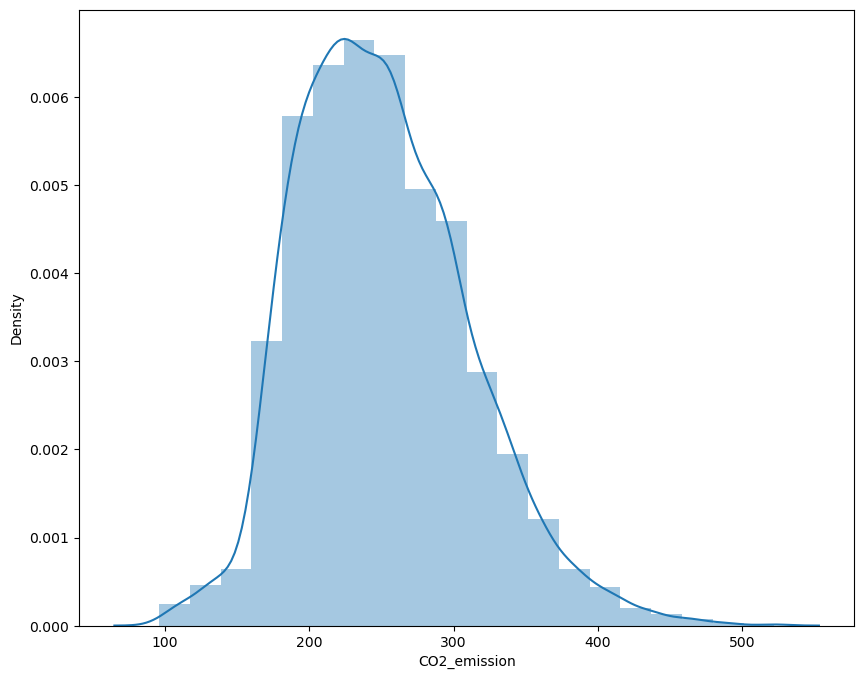

In [ ]:
sns.distplot(y_lasso_pred, bins=20,color='red')
plt.show()
sns.distplot(data1['CO2_emission'], bins=20)
plt.show()

#  <font color='green'> RIDGE REGRESSION </font>
 <font color='black'> Similar to lasso regression but uses l2 norm or Eucledian norm of the weight vector. </font>

In [ ]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
model.intercept_

250.6581622483556

In [ ]:
model.coef_

array([ 2.74627430e-02, -2.10524681e-02,  3.75141561e-02,  5.19339249e-01,
        2.05022961e+00,  2.53487574e+01,  1.35225750e+01,  1.92857659e+01,
       -6.85726097e+00, -3.05786036e+01, -1.52918325e+01, -1.50403933e+01,
        2.55402529e-01,  2.75041518e-02,  3.15230520e-02, -1.01763377e-01])

In [ ]:
y_ridge = model.predict(X_test)
y_ridge

array([212.47988537, 246.8793155 , 255.12799277, ..., 183.26948884,
       296.41601572, 209.43681957])

In [ ]:
np.sqrt(mean_squared_error(y_ridge,y_test))

5.26190351956303

In [ ]:
r2_score(y_test,y_ridge)

0.9923624509306176

In [ ]:
frames = [y_ridge, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

0      1
0     212.479885  213.0
1     246.879316  242.0
2     255.127993  259.0
3     310.267760  306.0
4     170.239029  173.0
...          ...    ...
1250  221.160047  220.0
1251  481.912579  476.0
1252  183.269489  184.0
1253  296.416016  292.0
1254  209.436820  205.0

[1255 rows x 2 columns]

In [ ]:
ridge_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
ridge_pred['pred_values'] = (ridge_pred['pred_values'].map(lambda x: round(x,2)))

ridge_pred['diff'] = abs(ridge_pred['real_values'] -ridge_pred['pred_values'])


print('mean diff: ', abs(ridge_pred['diff']).mean())

mean diff:  3.204709163346614


In [ ]:
ridge_pred.head(10)

pred_values  real_values  diff
0       212.48        213.0  0.52
1       246.88        242.0  4.88
2       255.13        259.0  3.87
3       310.27        306.0  4.27
4       170.24        173.0  2.76
5       294.92        290.0  4.92
6       329.02        332.0  2.98
7       173.13        173.0  0.13
8       233.32        233.0  0.32
9       256.36        256.0  0.36

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\2207294210.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CO2_emission', ylabel='Density'>

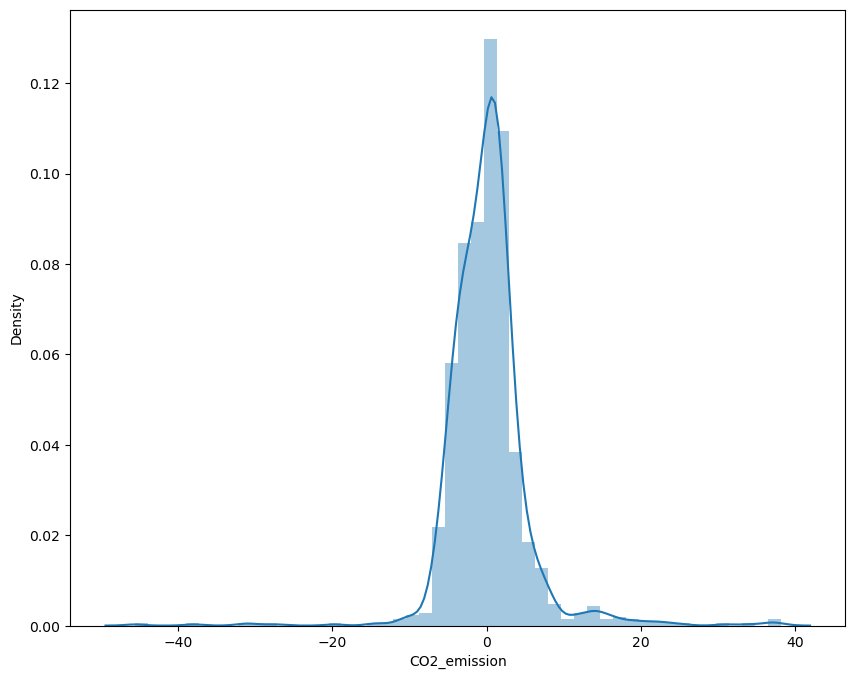

In [ ]:
sns.distplot(y_test-y_ridge)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\3228619013.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




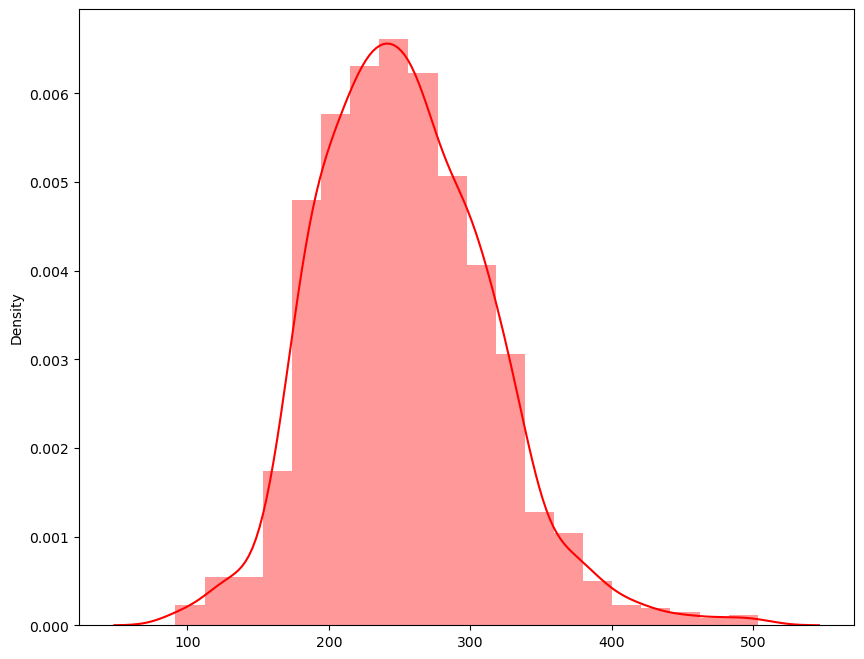

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3728\3228619013.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




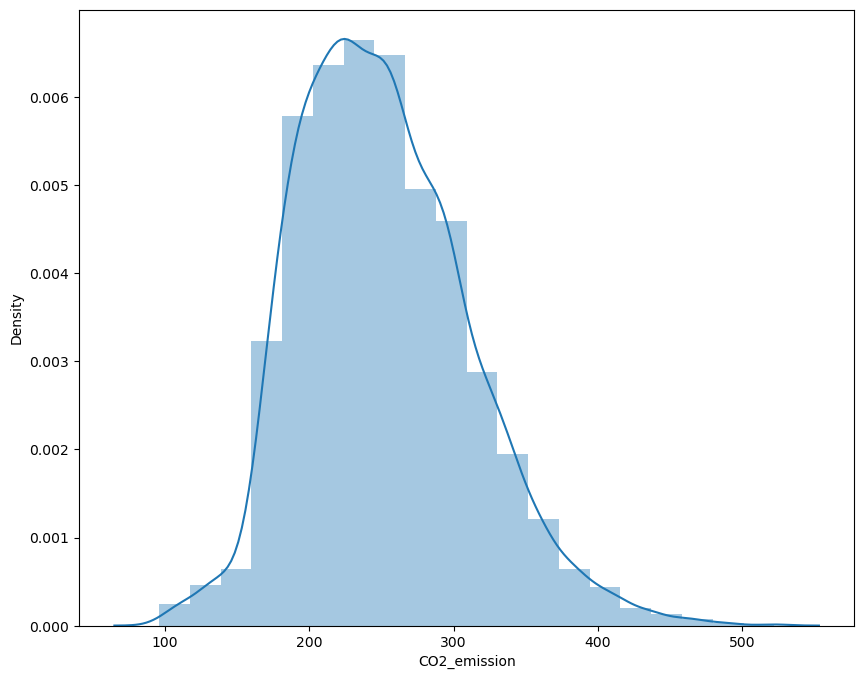

In [ ]:
sns.distplot(y_ridge, bins=20,color='red')
plt.show()
sns.distplot(data1['CO2_emission'], bins=20)
plt.show()


# <font color='green'> DECISION TREE REGRESSION </font>
 <font color='black'> A versatile learning algorithm that can perform regression, classification, multi-ouputs tasks even on complex data sets using tree structure(root and leaf nodes). </font>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
dtr_pred = model.predict(X_test)
dtr_pred

array([213., 246., 257., ..., 184., 292., 205.])

In [ ]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

5.267915615018793

In [ ]:
r2_score(y_test, dtr_pred)

0.9923449880843411

In [ ]:
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  213.0  213.0
1  246.0  242.0
2  257.0  259.0
3  310.0  306.0
4  172.0  173.0

In [ ]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())

mean diff:  2.5928127490039836


In [ ]:
dtr_pred.head(10)

pred_values  real_values  diff
0        213.0        213.0   0.0
1        246.0        242.0   4.0
2        257.0        259.0   2.0
3        310.0        306.0   4.0
4        172.0        173.0   1.0
5        294.0        290.0   4.0
6        327.0        332.0   5.0
7        170.0        173.0   3.0
8        232.0        233.0   1.0
9        256.0        256.0   0.0


## <font color='green'>RANDOM FOREST </font>
<font color='black'>Random forest is an ensemble of decision trees which introduces extra randomness(that is it searches for best feature among a random subset of fatures) when growing trees instead of searching for very best feature when splitting a node. </font>

In [ ]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([213.04      , 246.25      , 256.88      , ..., 182.90333333,
       292.06      , 206.13      ])

In [ ]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 4.3749
MAE: 2.5293
R2_score: 0.9947


In [ ]:
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  213.040000  213.0
1  246.250000  242.0
2  256.880000  259.0
3  310.170000  306.0
4  170.354667  173.0

In [ ]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  2.529322709163347


In [ ]:
y_rf_pred.head(10)

pred_values  real_values  diff
0       213.04        213.0  0.04
1       246.25        242.0  4.25
2       256.88        259.0  2.12
3       310.17        306.0  4.17
4       170.35        173.0  2.65
5       292.00        290.0  2.00
6       328.77        332.0  3.23
7       173.96        173.0  0.96
8       230.74        233.0  2.26
9       255.58        256.0  0.42


# <font color='green'> SUPPORT  VECTOR MACHINE </font>

<font color='black'> SVM is also a versatile learning algo able to perform linear and non-linear classification, regression and even outlier detection. </font>

In [ ]:

from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(X_train, y_train)
y_svr_pred = model.predict(X_test)
y_svr_pred

array([212.62788233, 245.22322722, 256.21520772, ..., 182.09091832,
       296.40194807, 209.07348075])

In [ ]:
np.sqrt(mean_squared_error(y_svr_pred,y_test))

5.59939649612761

In [ ]:
r2_score(y_svr_pred,y_test)

0.9915919823200859

In [ ]:
frames = [y_svr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  212.627882  213.0
1  245.223227  242.0
2  256.215208  259.0
3  311.084848  306.0
4  170.465779  173.0

In [ ]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))

y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])


print('mean diff: ', abs(y_svr_pred['diff']).mean())

mean diff:  2.927880478087649


In [ ]:
y_svr_pred.head(10)

pred_values  real_values  diff
0       212.63        213.0  0.37
1       245.22        242.0  3.22
2       256.22        259.0  2.78
3       311.08        306.0  5.08
4       170.47        173.0  2.53
5       294.43        290.0  4.43
6       330.71        332.0  1.29
7       173.32        173.0  0.32
8       232.06        233.0  0.94
9       255.68        256.0  0.32


# <font color=' green'> APPROACH 2 </font>

In [ ]:
models =['LinReg','LasReg','RidReg','DT', 'RF',"SVR"]

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})




for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)

        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

    elif models[i] =='LasReg':
        model = Lasso(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)

        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Lasso Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

    elif models[i] =='RidReg':
        model = Ridge(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)

        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Ridge Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)

        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)

        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

    else :
        models[i] =='SVM'
        model = LinearSVR()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)

        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Support Vector Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]


## <font color='Green'>OVERALL PERFORMANCE OF ALL MODELS IN A DATAFRAME </font>

In [ ]:
frame

models  rmse_train  mae_train  r2_train  rmse_test  \
0          Linear Regression    5.121354   3.134431  0.992458   5.262025   
1           Lasso Regression    5.202035   3.208321  0.992219   5.370202   
2           Ridge Regression    5.121357   3.134854  0.992458   5.261904   
3   Decision Tree Regression    0.940111   0.319793  0.999746   5.236032   
4   Random Forest Regression    1.668777   1.006812  0.999199   4.293755   
5  Support Vector Regression    5.486019   2.856030  0.991346   5.596405   

   mae_test   r2_test  
0  3.204492  0.992362  
1  3.299791  0.992045  
2  3.204704  0.992362  
3  2.565843  0.992437  
4  2.503010  0.994914  
5  2.926097  0.991361

# Metrics used for model evaluation:

### 1. <font color='Green'>RMSE(Root Mean Squared Error):</font>

- RMSE is the standard deviation of the prediction errors called residuals. Residuals point to the randomness of data points from the regression line. RMSE tells us how concentrated the data is around the regression line.



### 2. <font color='Green'>MAE(Mean Absolute Error):</font>
        
-  MAE measures the absolute distance between the real data and predicted data.


### 3. <font color='Green'>R2 score: </font>
- R-Square is another statistical measure which indicates how well the regression predictions approximate the real data points.